<a href="https://colab.research.google.com/github/IbrahimTGhanem/DiabetesPrediction/blob/main/Main_codebook_Toronto_CMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Designing a Contextual-Risk-Prediction Model for Type 2 Diabetes Using Machine Learning**

**Section 1: Introduction**

Over the past three decades, the prevalence of type 2 diabetes has increased in all countries; and currently, there are 422 million people around the world who are experiencing this chronic disease, according to the World Health Organization. This enormous number stresses the magnitude of this issue at a global level. At the local level of Canada, according to Statistics Canada, 3 million Canadians (9%) are diagnosed with diabetes. In addition to having 6% of adults in Canada identified as prediabetic, this disease is expected to have an increasing average rate of 3.3% every year. To reduce the potential future burden on healthcare systems, there is a need for developing predictive models that can identify potential areas that might have significant presence of diabetes; and require area-based interventions that would improve the well-being of residents. Thus, for this machine learning (ML) project, I aimed at developing a tool that can help urban and community planners identify potential neighbourhoods with higher risks of having significant levels of diabetes.

**1.1: Importing Libraries and exploring data**

In [ ]:
pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
import statsmodels.api as sm
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from category_encoders import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import make_scorer
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import plot_tree
warnings.filterwarnings('ignore')

In [ ]:
#FUNCTION TO CONNECT DATA - DEPENDING ON PERSON WORKING ON THE FILE

from google.colab import files

# Upload Options
user_choice = input("Specify user (I): ")

if user_choice == 'I':
    # Option I: Mount Google Drive - Ibrahim
    from google.colab import drive
    drive.mount('/content/drive')
    data = pd.read_csv("drive/My Drive/Colab Notebooks/ML 2023/0 Datathons/Datathon 6/Toronto CMA.csv") #Ibrahim path File

else:
    print("Invalid choice. Please specify user (I and try again.")


print(data.shape)

Specify user (I): I
Mounted at /content/drive
(1149, 30)


In [ ]:
# Viewing the first few rows of the dataset
data.head()

,spatial_id,Mental Health Score,Mental Health Binary,Unemployment Rate,High Education Rate,Average Income,Median Age,Recent Immigrant Rate,Rented Rate,Visible Minority Rate,...,Diabetes Type 2 rate,Diabetes,Overweight,Obese,Residential Instability,Material Deprivation,Ethnic Concentration,Residential Instability quintiles,Material Deprivation quintiles,Ethnic Concentration quintiles
0,5350001.0,3.943070,0,7.5,57.9439,140470.9957,41.0,1.9640,33.0677,35.0245,...,6.5107,0,31.9850,21.0068,0.082319,-0.940159,-0.229802,3,1,2
1,5350002.0,3.772154,0,5.2,61.1722,149880.7211,58.3,0.3378,7.8358,0.0100,...,11.9783,1,41.2641,15.5695,0.161009,0.354992,-1.339000,3,4,1
2,5350003.0,3.804840,0,10.0,62.5397,103790.1244,44.6,23.6495,38.1295,20.3100,...,7.3599,0,41.3378,15.4334,2.388299,-1.523984,1.279890,5,1,4
3,5350004.0,3.473871,1,11.5,34.8887,68088.0300,38.2,6.5911,93.3799,52.3959,...,13.3462,1,29.3714,25.1835,2.373135,1.345854,0.804453,5,5,4
4,5350005.0,3.699146,1,8.5,46.4921,83009.5819,36.0,9.3404,71.3352,48.1815,...,8.4192,0,32.2253,22.2522,2.267341,0.527991,0.655762,5,4,4


In [ ]:
description = data.describe()
description

,spatial_id,Mental Health Score,Mental Health Binary,Unemployment Rate,High Education Rate,Average Income,Median Age,Recent Immigrant Rate,Rented Rate,Visible Minority Rate,...,Diabetes Type 2 rate,Diabetes,Overweight,Obese,Residential Instability,Material Deprivation,Ethnic Concentration,Residential Instability quintiles,Material Deprivation quintiles,Ethnic Concentration quintiles
count,1.149000e+03,1149.000000,1149.000000,1149.000000,1149.000000,1.149000e+03,1149.000000,1149.000000,1149.000000,1149.000000,...,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000
mean,5.350378e+06,3.708185,0.456919,8.882446,43.660143,1.404743e+05,41.131506,8.175071,30.716517,52.062515,...,7.341533,0.200174,31.421496,17.407454,0.089070,0.035727,0.850820,2.961706,3.134030,3.770235
std,1.928752e+02,0.180842,0.498357,2.988478,15.268003,8.693268e+04,5.289810,5.322161,22.775151,26.214372,...,3.776123,0.400305,6.047741,4.355703,0.966249,0.848042,0.801010,1.412462,1.355515,1.135943
min,5.350001e+06,3.044088,0.000000,0.010000,8.145900,4.506773e+04,28.200000,0.337800,0.010000,0.010000,...,0.000000,0.000000,13.242700,5.422700,-1.716538,-1.961844,-1.339000,1.000000,1.000000,1.000000
25%,5.350241e+06,3.590828,0.000000,7.100000,32.324900,9.830399e+04,37.400000,4.420000,11.640900,29.080100,...,4.415800,0.000000,27.972000,14.323800,-0.619886,-0.548663,0.187175,2.000000,2.000000,3.000000
50%,5.350400e+06,3.728502,0.000000,8.600000,41.694100,1.230081e+05,40.500000,6.909500,23.831600,52.253500,...,7.448100,0.000000,31.539000,17.385600,-0.023471,-0.119926,0.850800,3.000000,3.000000,4.000000
75%,5.350525e+06,3.838962,1.000000,10.400000,55.082500,1.510459e+05,44.300000,10.700400,46.742000,74.989800,...,9.984600,0.000000,34.952700,20.353100,0.615760,0.436542,1.456866,4.000000,4.000000,5.000000
max,5.350832e+06,4.114386,1.000000,37.900000,81.938000,1.127636e+06,84.900000,35.849100,100.000000,98.758200,...,23.839600,1.000000,51.869500,39.633600,3.398448,4.197645,3.158430,5.000000,5.000000,5.000000


In [ ]:
# Checking for missing values
print(data.isnull().sum())

spatial_id                           0
Mental Health Score                  0
Mental Health Binary                 0
Unemployment Rate                    0
High Education Rate                  0
Average Income                       0
Median Age                           0
Recent Immigrant Rate                0
Rented Rate                          0
Visible Minority Rate                0
Visible Minority Binary              0
Work Stress Score                    0
Work Stress binary                   0
Rate of Regular alcohol              0
Active transportation                0
Rate of Active population            0
Rate of Daily Smokers                0
Total Population                     0
Food Insecurity score                0
Food Insecurity binary               0
Diabetes Type 2 rate                 0
Diabetes                             0
Overweight                           0
Obese                                0
Residential Instability              0
Material Deprivation     

**1.2: Process of omitting irrelevant columns (ensuring high data quality)**

In [ ]:
identifiers_to_drop = ['spatial_id']
data = data.drop(columns=identifiers_to_drop)

In [ ]:
Continous_label = ['Diabetes Type 2 rate']
data = data.drop(columns=Continous_label)

In [ ]:
population = ['Total Population']
data = data.drop(columns=population)


**Section 2: Data Engineering Process**

In [ ]:
# Listing of different types variables
binary_variables = [
    "Visible Minority Binary",
    "Food Insecurity binary",
    "Work Stress binary",
    "Mental Health Binary"
]

In [ ]:
categorical_variables = ['Residential Instability quintiles', 'Material Deprivation quintiles', 'Ethnic Concentration quintiles']

In [ ]:
Numeric_variables = ['Ethnic Concentration', 'Material Deprivation', 'Residential Instability', 'Unemployment Rate', 'Obese', 'Mental Health Score',
                      'Overweight', 'Food Insecurity score', 'Rate of Daily Smokers', 'Rate of Active population', 'Active transportation', 'Rate of Regular alcohol', 'Recent Immigrant Rate',
                      'Work Stress Score', 'Visible Minority Rate', 'Rented Rate', 'Median Age', 'Average Income', 'High Education Rate']

In [ ]:
data['Diabetes Label'] = np.where(data['Diabetes'] == 1, 'High', 'Low')

**2.1: checking potential class imbalance**

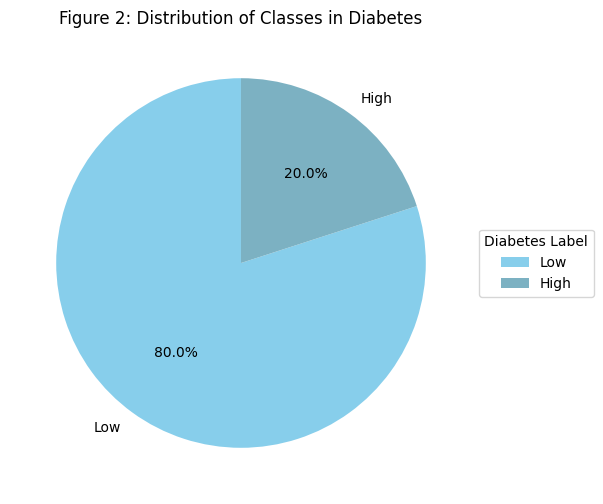

In [ ]:
# Calculating counts
counts = data['Diabetes Label'].value_counts()

# Defining colors
colors = ['#87CEEB', '#7cb1c2']

# Ploting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Figure 2: Distribution of Classes in Diabetes')
plt.legend(title='Diabetes Label', loc='center left', bbox_to_anchor=(1, 0.5))

# Showing the plot
plt.show()


While there are no missing values in the label class, there is a clear class imbalance in the label/target variable where only 20% of the observations belong to the category of 'High Diabetes'. This issue entails the need for either upsampling or downsampling, which will be tackled before running classification models.


**2.2 Visualization variables, correlation, and understanding outliers**

**2.2.1 Visualizing Variables**

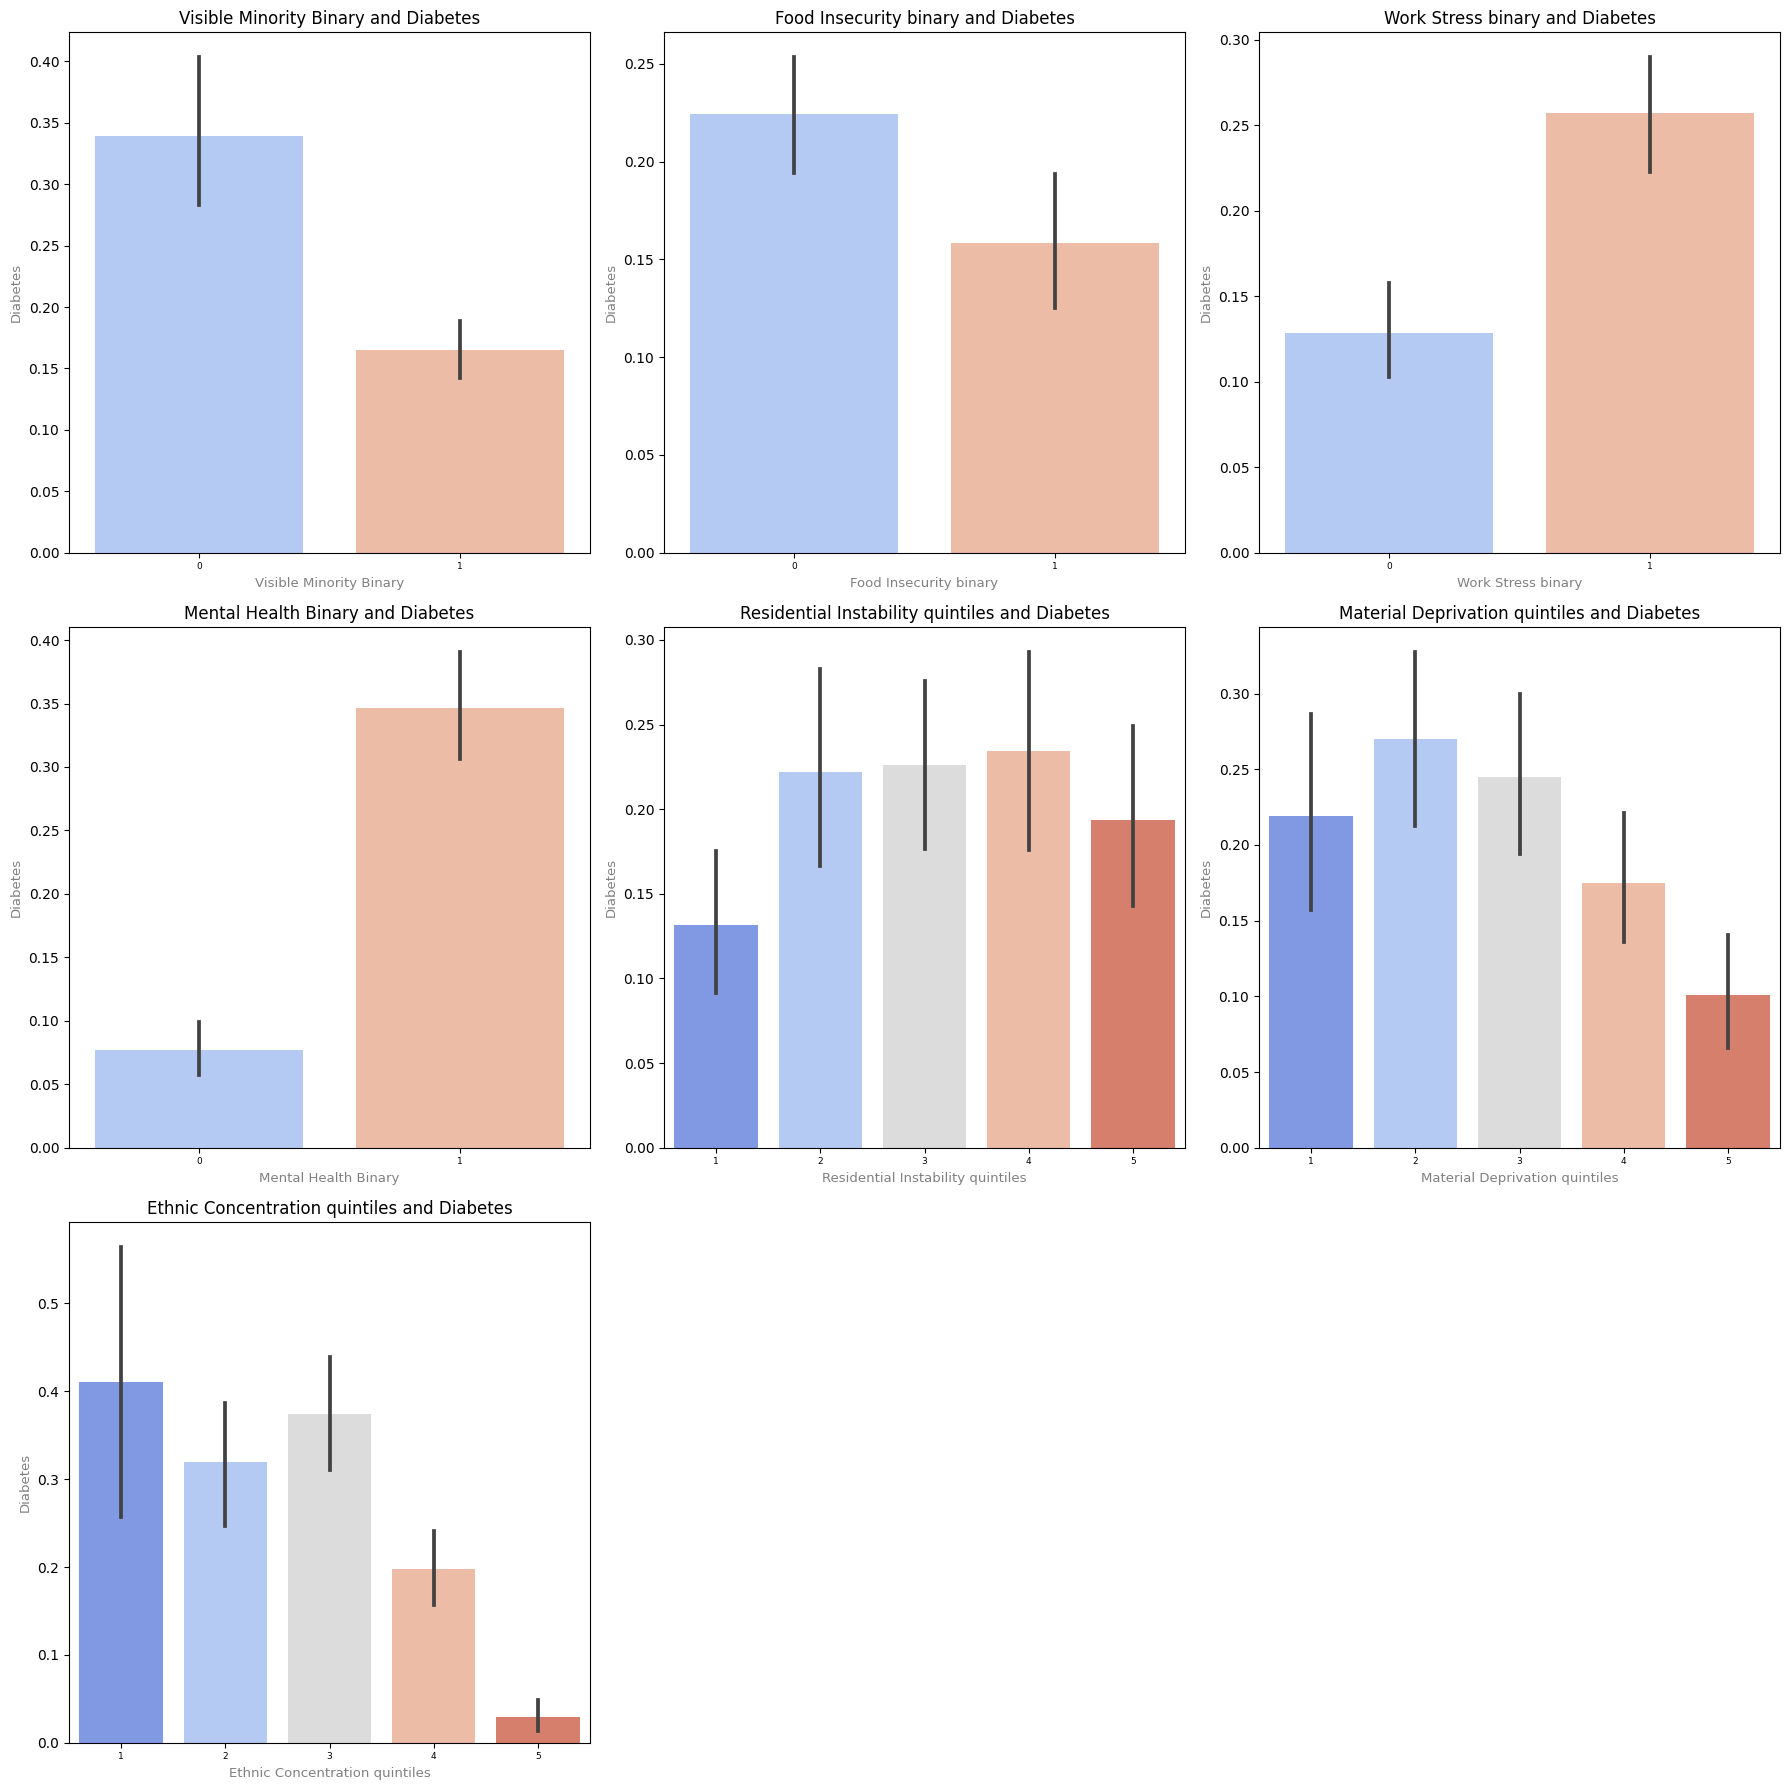

In [ ]:
# Grouping variables into binary, ordinal, and categorical
binary_categorical = binary_variables + categorical_variables

#Setting Y/class

Class= 'Diabetes'

# Determining the number of subplots in each row
subplots_per_row = 3
total_rows = len(binary_categorical) // subplots_per_row + 1

# Creating bar plots
fig, axes = plt.subplots(total_rows, subplots_per_row, figsize=(18, 6 * total_rows))

for i, variable_name in enumerate(binary_categorical):
    row = i // subplots_per_row
    col = i % subplots_per_row
    sns.barplot(data=data, x=variable_name, y=Class, palette='coolwarm', ax=axes[row, col])
    axes[row, col].set_title(f"{variable_name} and {Class}")

# Adjusting the font size for unit names
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), fontsize=6.5)

# Adding and adjusting lables for both axes
for row in axes:
    for ax in row:
        ax.set_xlabel(ax.get_xlabel(), color='grey', fontsize=9.5)
        ax.set_ylabel(ax.get_ylabel(), color='grey', fontsize=9.5)

# Removing  empty subplots
for i in range(len(binary_categorical), total_rows * subplots_per_row):
    fig.delaxes(axes[i // subplots_per_row, i % subplots_per_row])

plt.tight_layout()
plt.show()

In [ ]:
# Assuming your DataFrame is named 'data'
data['Instability_Deprivation'] = (data['Material Deprivation quintiles'] == 2) & (data['Residential Instability quintiles'] == 4)

data['Instability_Deprivation'] = data['Instability_Deprivation'].astype(int)

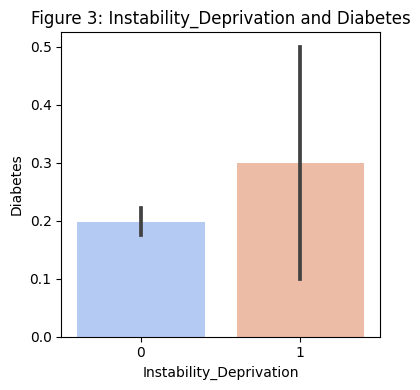

In [ ]:
#Visualizing the new interaction term
fig, axes = plt.subplots(1, 1, figsize=(4, 4))

# Plot the subplot
sns.barplot(data=data, x="Instability_Deprivation", y="Diabetes", palette='coolwarm', ax=axes)
axes.set_title("Figure 3: Instability_Deprivation and Diabetes")

# Adjust the layout and display the plot
plt.tight_layout()

# Visualize the plot
plt.show()

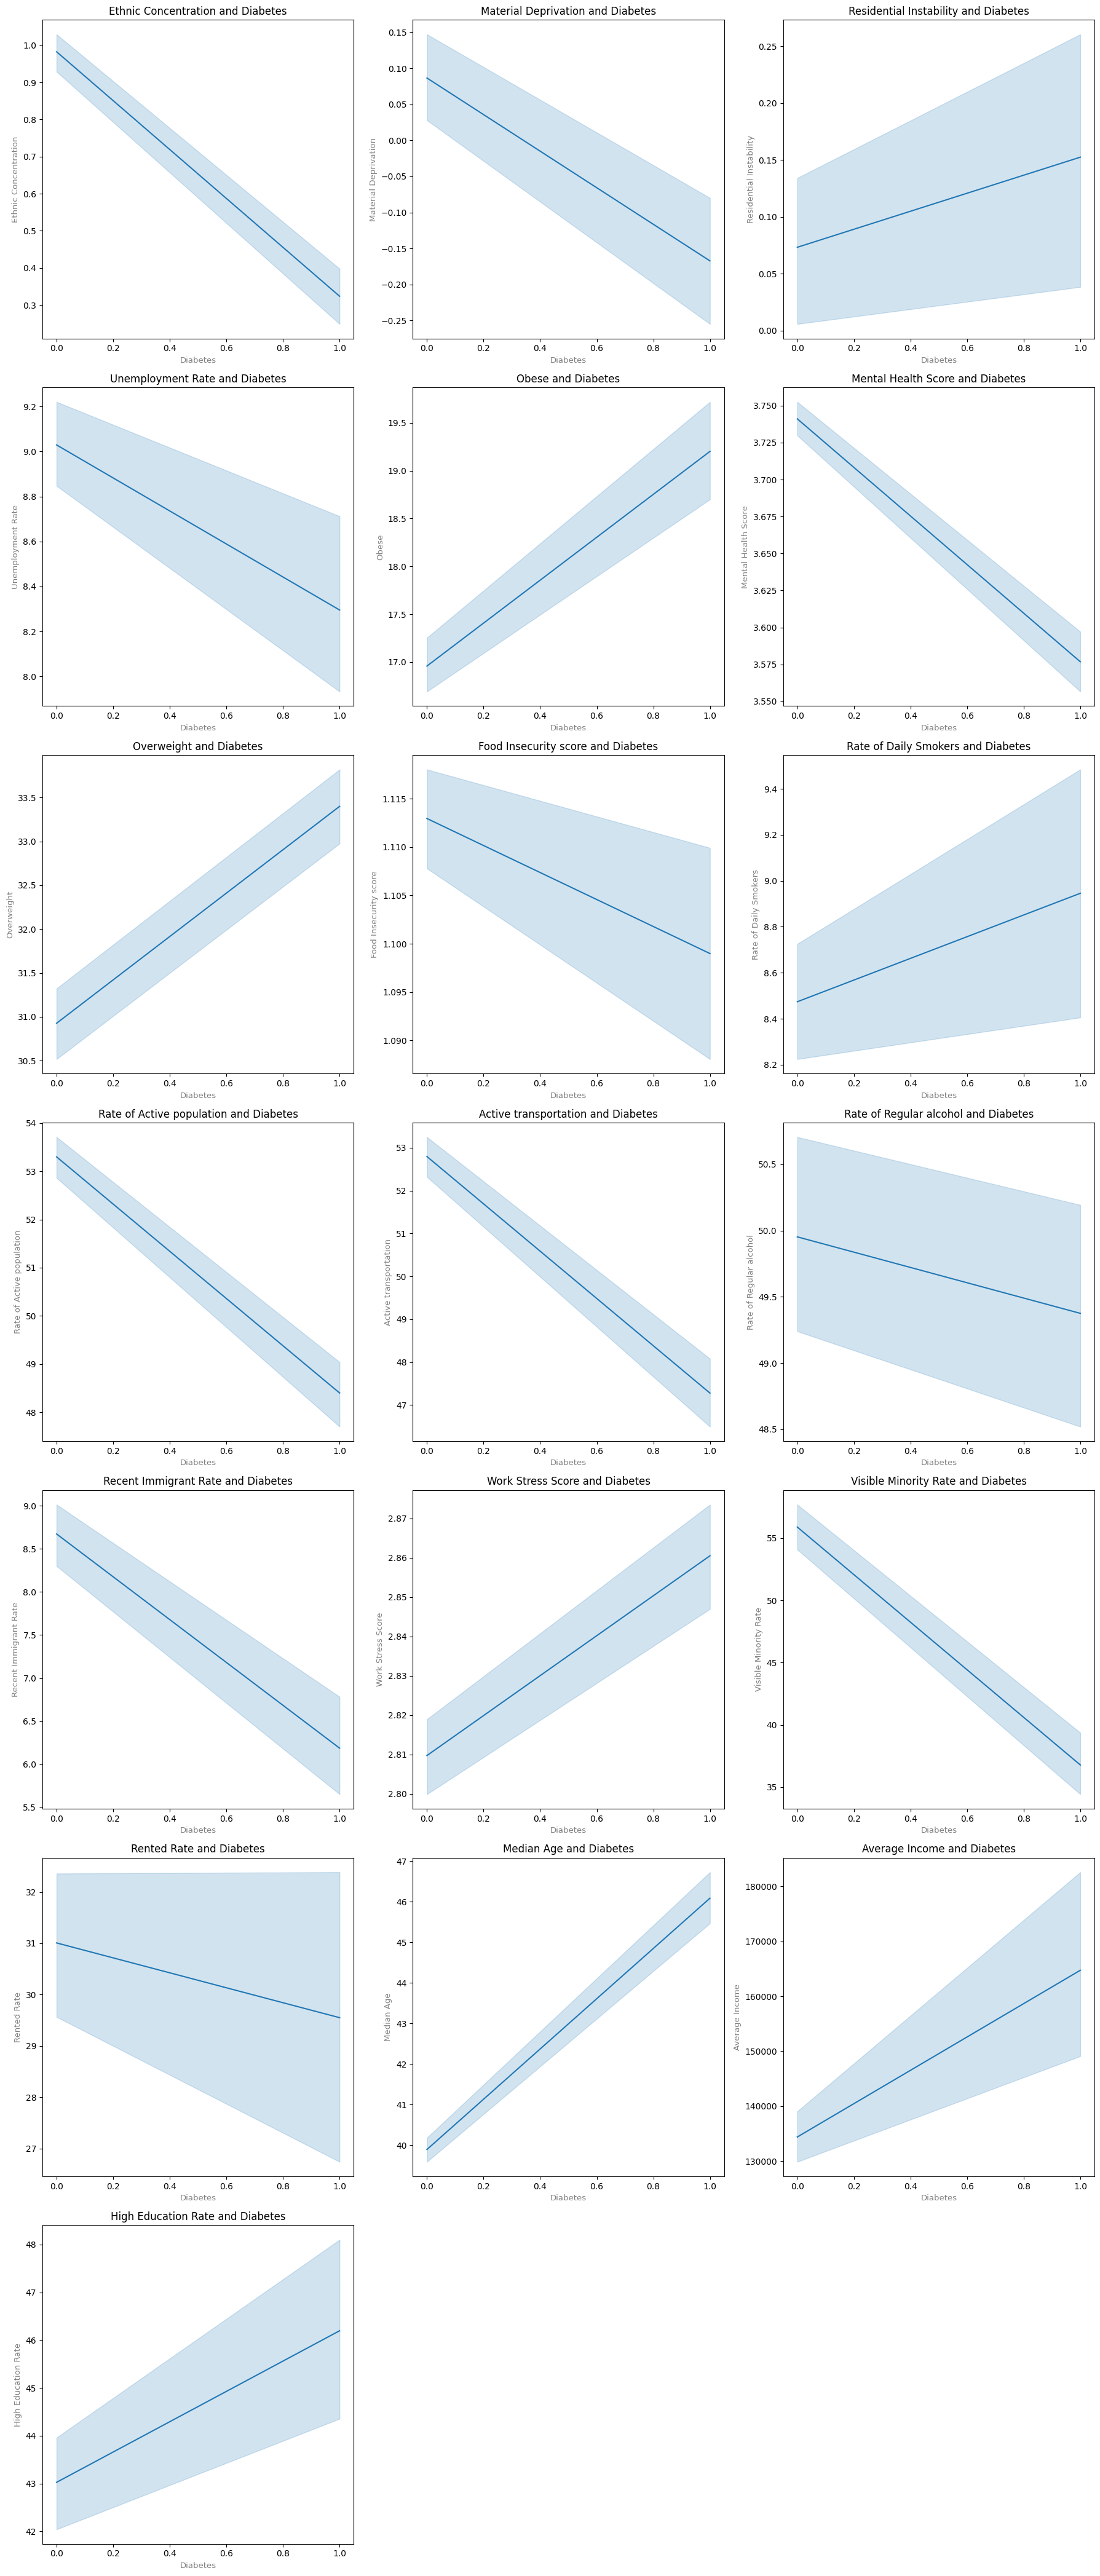

In [ ]:
Class = 'Diabetes'

# Determining the number of subplots in each row
subplots_per_row = 3
total_rows = len(Numeric_variables) // subplots_per_row + 1

# Creating line plots
fig, axes = plt.subplots(total_rows, subplots_per_row, figsize=(18, 6 * total_rows))

for i, variable_name in enumerate(Numeric_variables):
    row = i // subplots_per_row
    col = i % subplots_per_row
    sns.lineplot(data=data, x=Class, y=variable_name, palette='coolwarm', ax=axes[row, col])
    axes[row, col].set_title(f"{variable_name} and {Class}")

# Adding and adjusting labels for both axes
for row in axes:
    for ax in row:
        ax.set_xlabel(ax.get_xlabel(), color='grey', fontsize=9.5)
        ax.set_ylabel(ax.get_ylabel(), color='grey', fontsize=9.5)

# Removing empty subplots
for i in range(len(Numeric_variables), total_rows * subplots_per_row):
    fig.delaxes(axes[i // subplots_per_row, i % subplots_per_row])

plt.tight_layout()
plt.show()



**2.2.1 Examining correlation patterns**

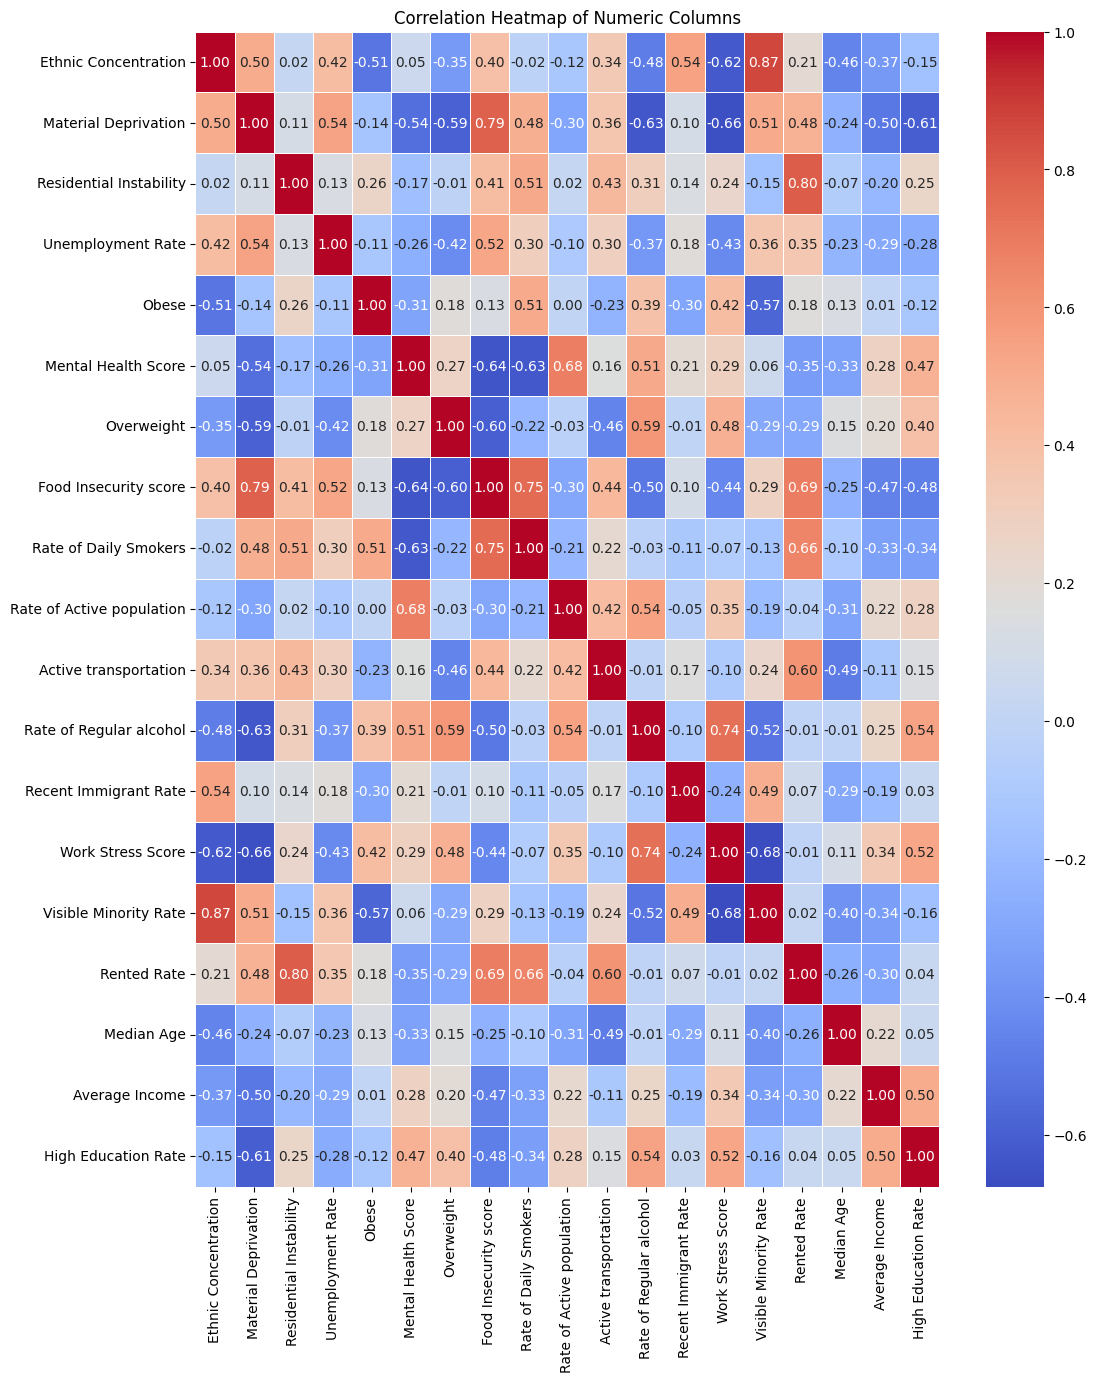

In [ ]:
# Creating a DataFrame with only the selected columns
numeric_data = data[Numeric_variables]

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Creating a heatmap
plt.figure(figsize=(12, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [ ]:
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_correlation_pairs.append(pair)

print("Pairs of variables with correlation > 0.7:")
for pair in high_correlation_pairs:
    print(pair)

Pairs of variables with correlation > 0.7:
('Ethnic Concentration', 'Visible Minority Rate')
('Material Deprivation', 'Food Insecurity score')
('Residential Instability', 'Rented Rate')
('Food Insecurity score', 'Rate of Daily Smokers')
('Rate of Regular alcohol', 'Work Stress Score')


As ethnic concentration, material deprivation, residenial instability, and food insecurity are presented inquintiles and binary, they will be ddropped.

In [ ]:
numeric_variables_to_drop = ['Ethnic Concentration', 'Material Deprivation', 'Residential Instability', 'Food Insecurity score', 'Rate of Regular alcohol']

In [ ]:
data = data.drop(columns=numeric_variables_to_drop)

In [ ]:
Numeric_variables =[var for var in Numeric_variables if var not in numeric_variables_to_drop]

In [ ]:
Numeric_variables

['Unemployment Rate',
 'Obese',
 'Mental Health Score',
 'Overweight',
 'Rate of Daily Smokers',
 'Rate of Active population',
 'Active transportation',
 'Recent Immigrant Rate',
 'Work Stress Score',
 'Visible Minority Rate',
 'Rented Rate',
 'Median Age',
 'Average Income',
 'High Education Rate']

**2.2.3 Examining normal distibution and outliers**

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

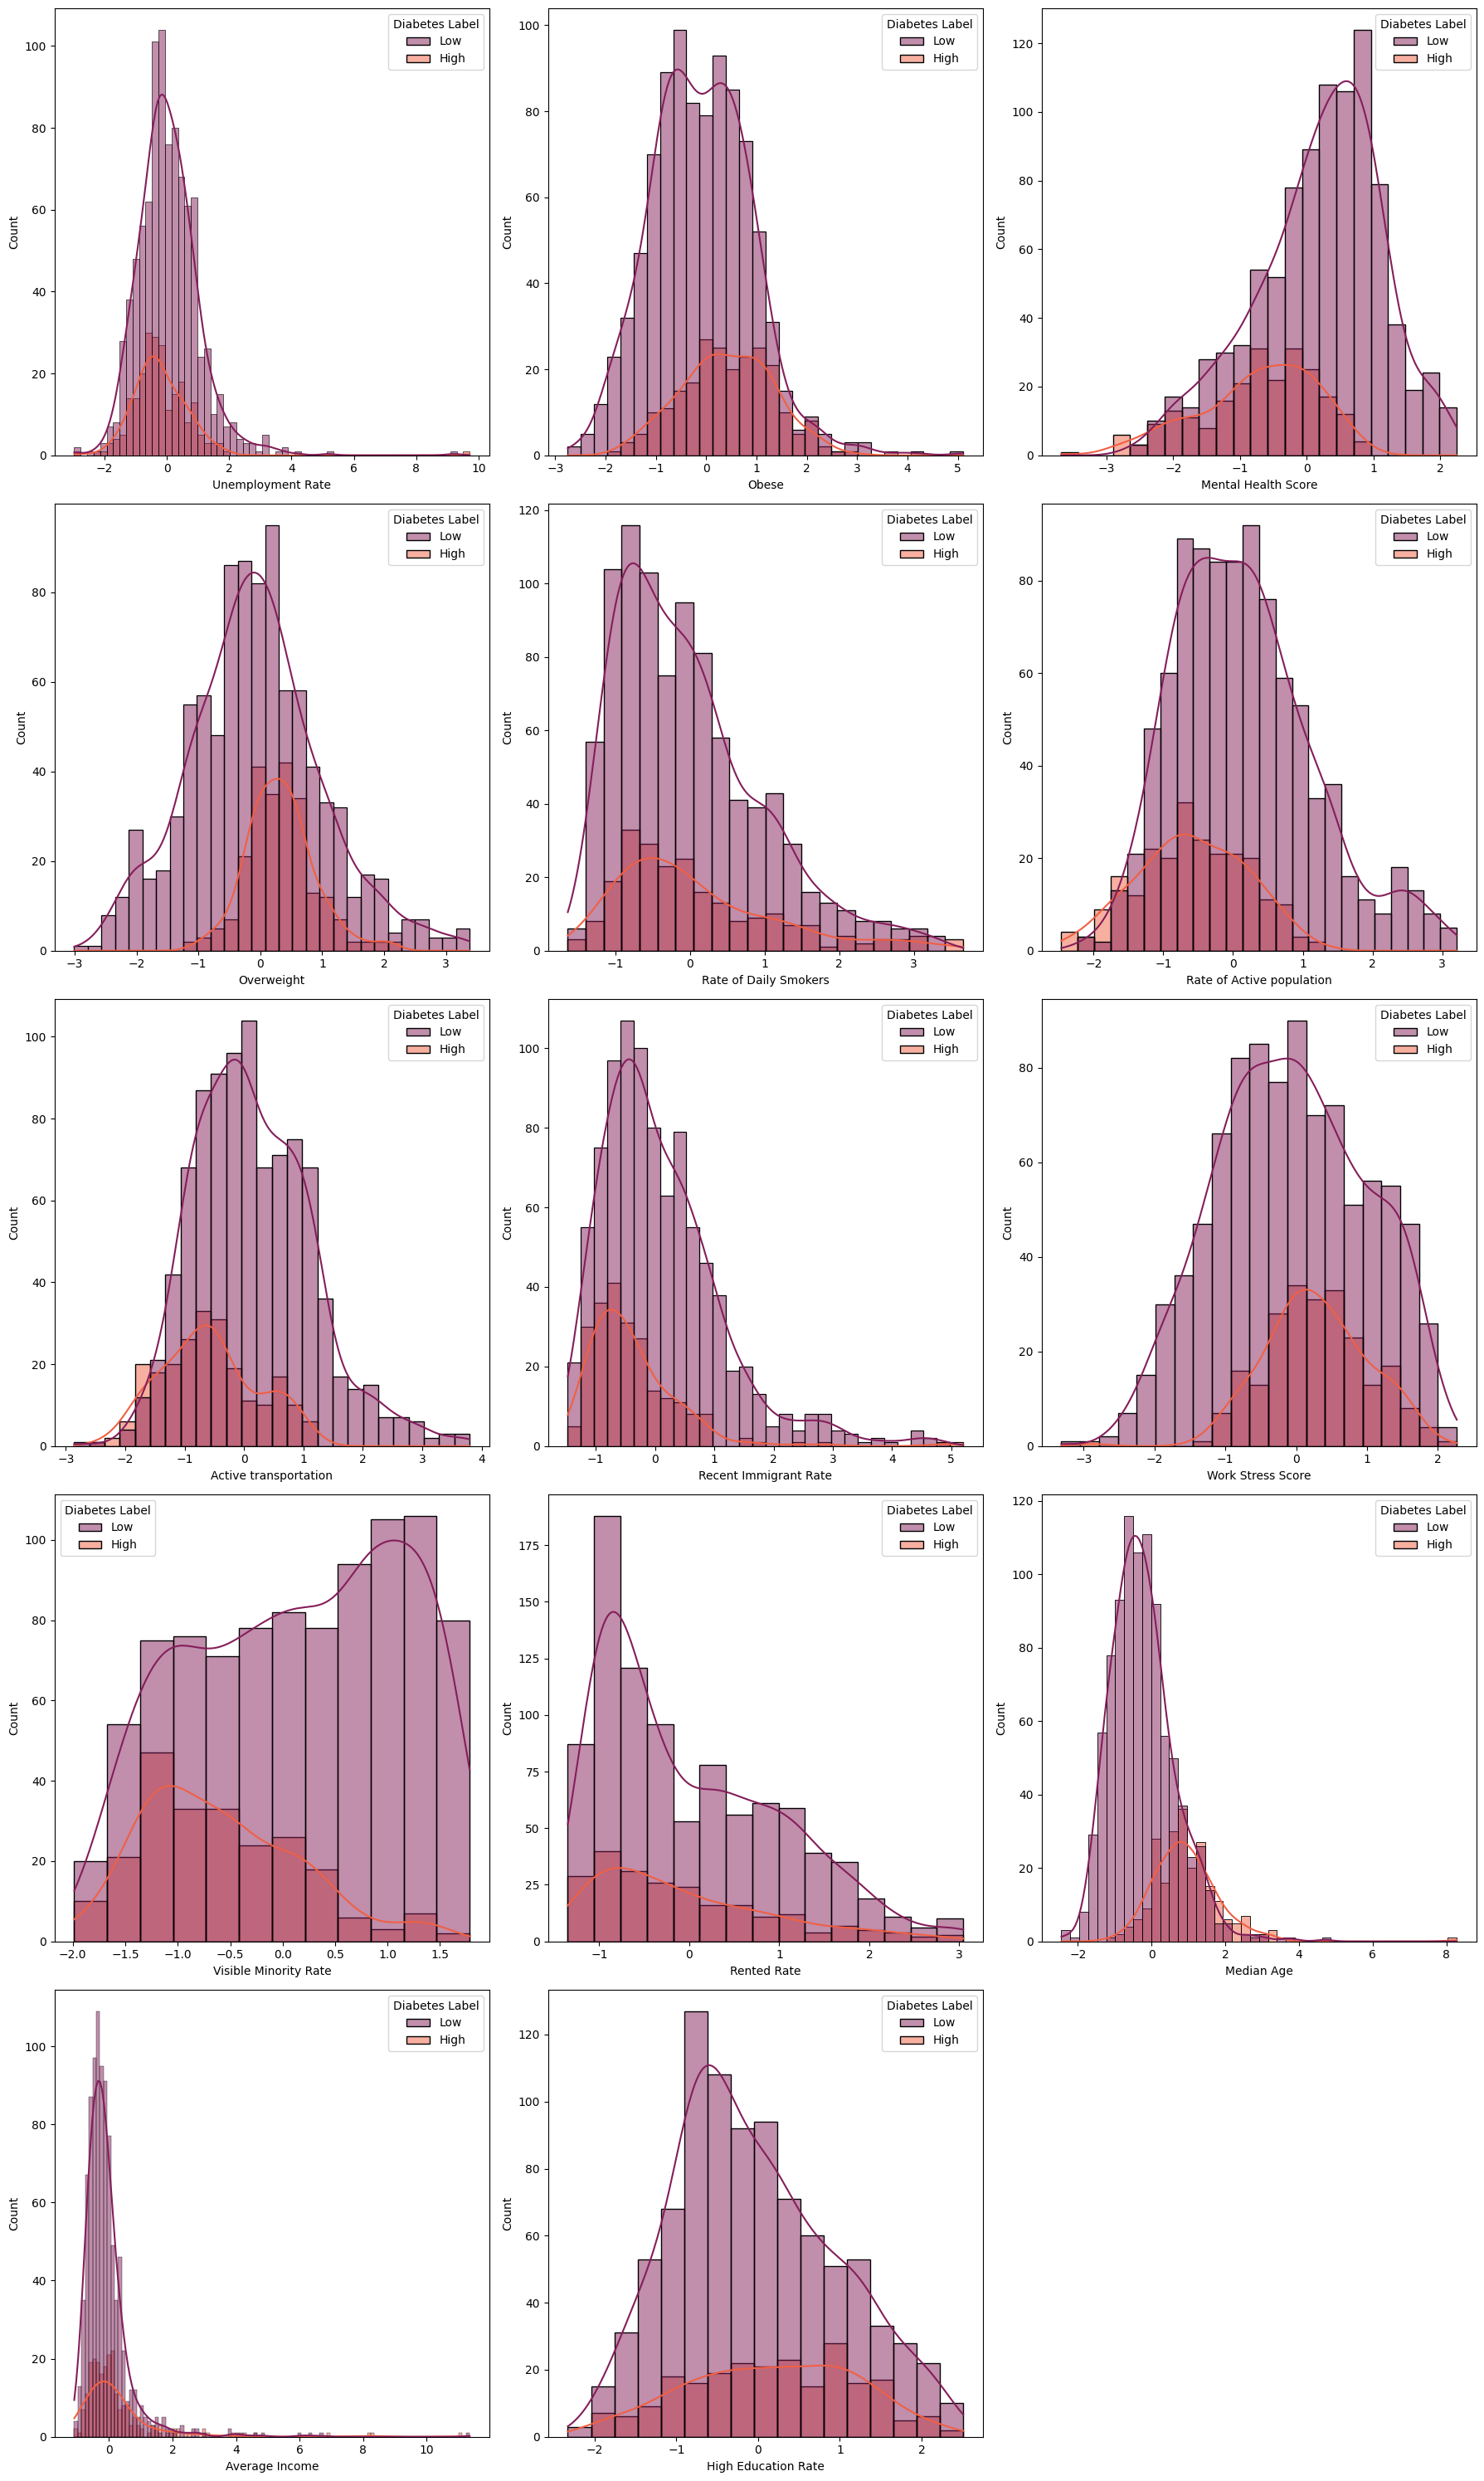

In [ ]:
# Determining the number of subplots in each row
subplots_per_row = 3
total_rows = len(Numeric_variables) // subplots_per_row + 1

# Creating a grid of subplots
fig, axs = plt.subplots(total_rows, subplots_per_row, figsize=(18, 6 * total_rows))

# Creating a copy of the original data
data_copy = data.copy()

# Looping through each feature in numeric variables
for i, column in enumerate(Numeric_variables):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // subplots_per_row
    y = i % subplots_per_row

    # Scaling the feature in the copied data using StandardScaler
    data_copy[column] = scaler.fit_transform(data_copy[[column]])

    # Plot a histogram of the scaled feature split by the 'hospital_death' class
    sns.histplot(data=data_copy, x=column, hue='Diabetes Label', kde=True, palette='rocket', ax=axs[x][y])

# Removing any empty subplots
for i in range(len(Numeric_variables), total_rows * subplots_per_row):
    fig.delaxes(axs[i // subplots_per_row, i % subplots_per_row])

# Display all the subplots
plt.tight_layout()
plt.show()

In [ ]:
#Removing visualization variable
data.drop(columns=['Diabetes Label'], inplace=True)

In [ ]:
# Defining a Z-score threshold
zscore_threshold = 4

# Initialize a dictionary to store variable names and their respective outlier counts
variables_with_outliers = {}

# Iterate through each continuous variable and identify variables with outliers
for variable_name in Numeric_variables:
    data_column = data[variable_name]
    z_scores = (data_column - data_column.mean()) / data_column.std()
    outliers_count = sum(abs(z_scores) > zscore_threshold)

    # Store the variable name and outlier count in the dictionary
    variables_with_outliers[variable_name] = outliers_count

# Printing the names of variables with their respective outlier counts
print("Variables with the number of outliers beyond 4 standard deviations:")
for variable_name, outliers_count in variables_with_outliers.items():
    print(f"{variable_name}: {outliers_count} observations")


Variables with the number of outliers beyond 4 standard deviations:
Unemployment Rate: 4 observations
Obese: 2 observations
Mental Health Score: 0 observations
Overweight: 0 observations
Rate of Daily Smokers: 0 observations
Rate of Active population: 0 observations
Active transportation: 0 observations
Recent Immigrant Rate: 10 observations
Work Stress Score: 0 observations
Visible Minority Rate: 0 observations
Rented Rate: 0 observations
Median Age: 2 observations
Average Income: 14 observations
High Education Rate: 0 observations


**Section 3: Data preperation fot simple models**

In [ ]:
DataSimple = data.copy()

In [ ]:
DataSimple.columns

Index(['Mental Health Score', 'Mental Health Binary', 'Unemployment Rate',
       'High Education Rate', 'Average Income', 'Median Age',
       'Recent Immigrant Rate', 'Rented Rate', 'Visible Minority Rate',
       'Visible Minority Binary', 'Work Stress Score', 'Work Stress binary',
       'Active transportation', 'Rate of Active population',
       'Rate of Daily Smokers', 'Food Insecurity binary', 'Diabetes',
       'Overweight', 'Obese', 'Residential Instability quintiles',
       'Material Deprivation quintiles', 'Ethnic Concentration quintiles',
       'Instability_Deprivation'],
      dtype='object')

In [ ]:
# List of columns for log transformation
log_columns = ['Unemployment Rate',
 'Obese',
 'Rate of Daily Smokers',
 'Recent Immigrant Rate',
 'Visible Minority Rate',
 'Rented Rate',
 'Median Age',
 'Average Income']

# Apply log transformation without mean imputation
for column in log_columns:
    # Apply log transformation directly
    DataSimple[f'log_{column.lower().replace(" ", "_")}'] = np.log(DataSimple[column])

In [ ]:
DataSimple.columns

Index(['Mental Health Score', 'Mental Health Binary', 'Unemployment Rate',
       'High Education Rate', 'Average Income', 'Median Age',
       'Recent Immigrant Rate', 'Rented Rate', 'Visible Minority Rate',
       'Visible Minority Binary', 'Work Stress Score', 'Work Stress binary',
       'Active transportation', 'Rate of Active population',
       'Rate of Daily Smokers', 'Food Insecurity binary', 'Diabetes',
       'Overweight', 'Obese', 'Residential Instability quintiles',
       'Material Deprivation quintiles', 'Ethnic Concentration quintiles',
       'Instability_Deprivation', 'log_unemployment_rate', 'log_obese',
       'log_rate_of_daily_smokers', 'log_recent_immigrant_rate',
       'log_visible_minority_rate', 'log_rented_rate', 'log_median_age',
       'log_average_income'],
      dtype='object')

In [ ]:
DataSimple_to_drop = ['Unemployment Rate',
 'Obese',
 'Rate of Daily Smokers',
 'Recent Immigrant Rate',
 'Visible Minority Rate',
 'Rented Rate',
 'Median Age',
 'Average Income']
DataSimple = DataSimple.drop(columns=DataSimple_to_drop, axis=1)

In [ ]:
# Specifying binary columns as integers
binary_columns = ['Visible Minority Binary', 'Work Stress binary', 'Food Insecurity binary', 'Instability_Deprivation', 'Mental Health Binary']
DataSimple[binary_columns] = DataSimple[binary_columns].astype(int)

Label_column = ['Diabetes']
DataSimple[Label_column] = DataSimple[Label_column].astype(int)

# Specifying categorical columns
categorical_columns = ['Residential Instability quintiles', 'Material Deprivation quintiles', 'Ethnic Concentration quintiles']
DataSimple[categorical_columns] = DataSimple[categorical_columns].astype('category')

# Specifying the rest as floats
float_columns = [col for col in DataSimple.columns if col not in binary_columns + categorical_columns + Label_column]
DataSimple[float_columns] = DataSimple[float_columns].astype(float)


In [ ]:
X_S = DataSimple.drop('Diabetes', axis=1)
y_S = DataSimple['Diabetes']

# Split the data into training and test sets
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y_S, test_size=0.2, random_state=42)

In [ ]:
# Application of RUS for downsampling on the training data
rus = RandomUnderSampler()
X_resampled_S, y_resampled_S = rus.fit_resample(X_train_S, y_train_S)


ct = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), categorical_columns),
    ],
    remainder='passthrough'
)

# Applying the one-hot encoding transformation to X_resampled and X_test
X_resampled_S = ct.fit_transform(X_resampled_S, y_resampled_S)
X_test_S = ct.transform(X_test_S)

In [ ]:
#converting numpyarray back to DataFrame
X_resampled_S = pd.DataFrame(X_resampled_S, columns=ct.get_feature_names_out())
X_test_S = pd.DataFrame(X_test_S, columns=ct.get_feature_names_out())

In [ ]:
(X_resampled_S.shape)

(340, 34)

In [ ]:
{X_test_S.shape}

{(230, 34)}

In [ ]:
{y_test_S.shape}

{(230,)}

In [ ]:
(y_resampled_S.shape)

(340,)

**Section 4: Creating Simple models**

**4.1 LR model**

In [ ]:
X_resampled_scaled = scaler.fit_transform(X_resampled_S)
X_test_scaled = scaler.transform(X_test_S)

As we have 35 shortlisted variables, testing all combinations might be infeasible. Thus, the recursive feature elimination with cross validation (RFECV) will be applied to find the optimal subset of variables that maximizes the performance of the model while also avoiding overfitting. Removing less important variables will make the model more interpretable, and more generalizable to unseen data. The tool initiates optimization with all variables included; thereafter, it eliminates one variables at a time. The tool relies on the average performance score of the model on the test data through each iteration.

In [ ]:
accuracy_scoring = make_scorer(accuracy_score)

In [ ]:
Log_reg_model = LogisticRegression()

cv_LR = StratifiedKFold(5)
rfecv_LR = RFECV(
    estimator=Log_reg_model,
    step=1,
    cv=cv_LR,
    scoring=accuracy_scoring,
    min_features_to_select=1,
)
rfecv_LR.fit(X_resampled_scaled, y_resampled_S)

# Print the optimal number of selected features
print(f"Optimal number of features -LR: {rfecv_LR.n_features_}")

Optimal number of features -LR: 4


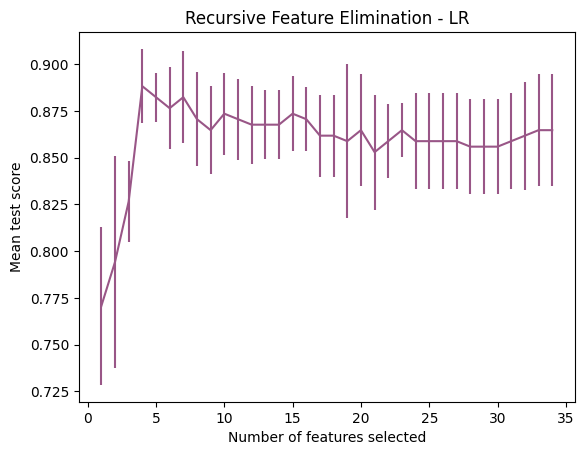

In [ ]:
# Calculate the number of different feature selections tested
n_scores_LR = len(rfecv_LR.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores_LR + 1),
    rfecv_LR.cv_results_["mean_test_score"],
    yerr=rfecv_LR.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination - LR")

# Show the plot
plt.show()

In [ ]:
selected_LR_features = X_resampled_S.columns[rfecv_LR.support_]
eliminated_LR_features = X_resampled_S.columns[~rfecv_LR.support_]

print("Selected Features for LR:")
print(selected_LR_features)
print("\nEliminated Features for LR:")
print(eliminated_LR_features)

Selected Features for LR:
Index(['remainder__Mental Health Score', 'remainder__High Education Rate',
       'remainder__log_visible_minority_rate', 'remainder__log_median_age'],
      dtype='object')

Eliminated Features for LR:
Index(['one_hot_encoder__Residential Instability quintiles_1',
       'one_hot_encoder__Residential Instability quintiles_2',
       'one_hot_encoder__Residential Instability quintiles_3',
       'one_hot_encoder__Residential Instability quintiles_4',
       'one_hot_encoder__Residential Instability quintiles_5',
       'one_hot_encoder__Material Deprivation quintiles_1',
       'one_hot_encoder__Material Deprivation quintiles_2',
       'one_hot_encoder__Material Deprivation quintiles_3',
       'one_hot_encoder__Material Deprivation quintiles_4',
       'one_hot_encoder__Material Deprivation quintiles_5',
       'one_hot_encoder__Ethnic Concentration quintiles_1',
       'one_hot_encoder__Ethnic Concentration quintiles_2',
       'one_hot_encoder__Ethnic Conc

In [ ]:
# Accessing the mean test scores
mean_test_scores_LR = rfecv_LR.cv_results_["mean_test_score"]

# Printing the list of mean test scores along with the number of selected features
for i, score_LR in enumerate(mean_test_scores_LR):
    num_selected_features = i + 1  #start with one feature
    print(f"Number of Selected Features: {num_selected_features}, Mean Test Score: {score_LR}")

Number of Selected Features: 1, Mean Test Score: 0.7705882352941177
Number of Selected Features: 2, Mean Test Score: 0.7941176470588236
Number of Selected Features: 3, Mean Test Score: 0.8264705882352942
Number of Selected Features: 4, Mean Test Score: 0.8882352941176471
Number of Selected Features: 5, Mean Test Score: 0.8823529411764707
Number of Selected Features: 6, Mean Test Score: 0.8764705882352942
Number of Selected Features: 7, Mean Test Score: 0.8823529411764707
Number of Selected Features: 8, Mean Test Score: 0.8705882352941176
Number of Selected Features: 9, Mean Test Score: 0.8647058823529411
Number of Selected Features: 10, Mean Test Score: 0.8735294117647058
Number of Selected Features: 11, Mean Test Score: 0.8705882352941176
Number of Selected Features: 12, Mean Test Score: 0.8676470588235293
Number of Selected Features: 13, Mean Test Score: 0.8676470588235293
Number of Selected Features: 14, Mean Test Score: 0.8676470588235293
Number of Selected Features: 15, Mean Test 

In [ ]:
LR_features = ['remainder__Mental Health Score', 'remainder__High Education Rate',
       'remainder__log_visible_minority_rate', 'remainder__log_median_age']

In [ ]:
#Fitting the data
X_train_scaled_LR = scaler.fit_transform(X_resampled_S[LR_features])
X_test_scaled_LR = scaler.transform(X_test_S[LR_features])

In [ ]:
LR_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
LR_model.fit(X_train_scaled_LR, y_resampled_S)

LogisticRegression(solver='liblinear')

In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_LR_model = cross_val_predict(LR_model, X_train_scaled_LR, y_resampled_S, cv=5)

# Calculating the full confusion matrix
conf_matrix_LR = confusion_matrix(y_resampled_S, predicted_labels_LR_model)

# Calculate the full classification report
class_report_LR = classification_report(y_resampled_S, predicted_labels_LR_model)

# Calculate accuracy
accuracy_LR = accuracy_score(y_resampled_S, predicted_labels_LR_model)

# Calculate precision
precision_LR = precision_score(y_resampled_S, predicted_labels_LR_model)

# Calculate recall
recall_LR = recall_score(y_resampled_S, predicted_labels_LR_model)

# Calculate F1 score
f1_LR = f1_score(y_resampled_S, predicted_labels_LR_model)


# Print the full confusion matrix and classification report
print("Logistic Regression Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_LR)
print("B. Classification Report:")
print(class_report_LR)
print("C. Accuracy: {:.2f}".format(accuracy_LR))
print("D. Precision: {:.2f}".format(precision_LR))
print("E. Recall (Sensitivity): {:.2f}".format(recall_LR))
print("F. F1 Score: {:.2f}".format(f1_LR))

Logistic Regression Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[143  27]
 [ 14 156]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       170
           1       0.85      0.92      0.88       170

    accuracy                           0.88       340
   macro avg       0.88      0.88      0.88       340
weighted avg       0.88      0.88      0.88       340

C. Accuracy: 0.88
D. Precision: 0.85
E. Recall (Sensitivity): 0.92
F. F1 Score: 0.88


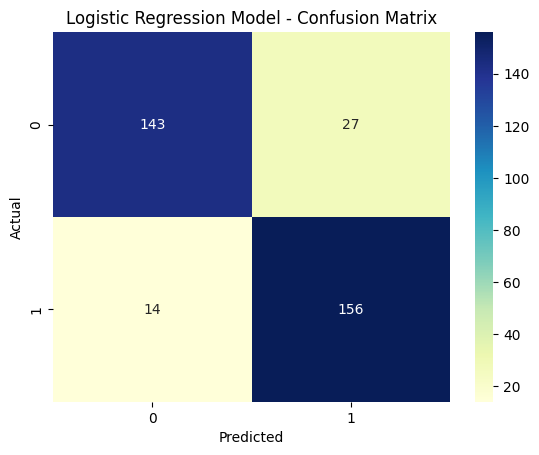

In [ ]:
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Logistic Regression Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Test ROC-AUC: 0.9449


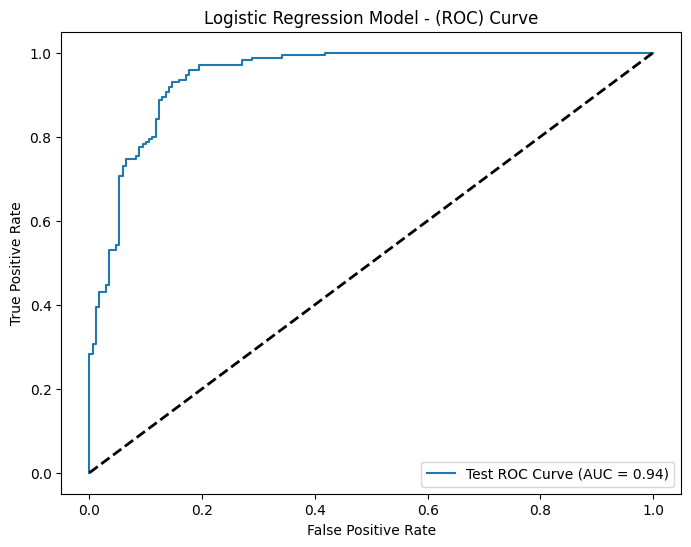

In [ ]:
predicted_probs_LR = LR_model.predict_proba(X_train_scaled_LR)[:, 1]  # probability of 1 (outcome)

# Calculate ROC-AUC on the train set
roc_auc_train_LR = roc_auc_score(y_resampled_S, predicted_probs_LR)
print(f"Test ROC-AUC: {roc_auc_train_LR:.4f}")

# Calculate ROC curve on the train set
fpr_LR, tpr_LR, _ = roc_curve(y_resampled_S, predicted_probs_LR)

# Plot ROC curve for the train set
plt.figure(figsize=(8, 6))
plt.plot(fpr_LR, tpr_LR, label=f'Test ROC Curve (AUC = {roc_auc_train_LR:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Making predictions on the test set of Logit Regression
y_pred_test_LR = LR_model.predict(X_test_scaled_LR)

# Calculating metrics
accuracy_test_LR = accuracy_score(y_test_S, y_pred_test_LR)
precision_test_LR = precision_score(y_test_S, y_pred_test_LR)
recall_test_LR = recall_score(y_test_S, y_pred_test_LR)
f1_test_LR = f1_score(y_test_S, y_pred_test_LR)
conf_matrix_test_LR = confusion_matrix(y_test_S, y_pred_test_LR)

# Printing the evaluation metrics
print("Logistic Regression Model - Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_LR))
print("Precision: {:.2f}".format(precision_test_LR))
print("Recall (Sensitivity): {:.2f}".format(recall_test_LR))
print("F1 Score: {:.2f}".format(f1_test_LR))
print("Confusion Matrix:")
print(conf_matrix_test_LR)

Logistic Regression Model - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.83
Precision: 0.62
Recall (Sensitivity): 0.88
F1 Score: 0.73
Confusion Matrix:
[[137  33]
 [  7  53]]


Test ROC-AUC: 0.9263


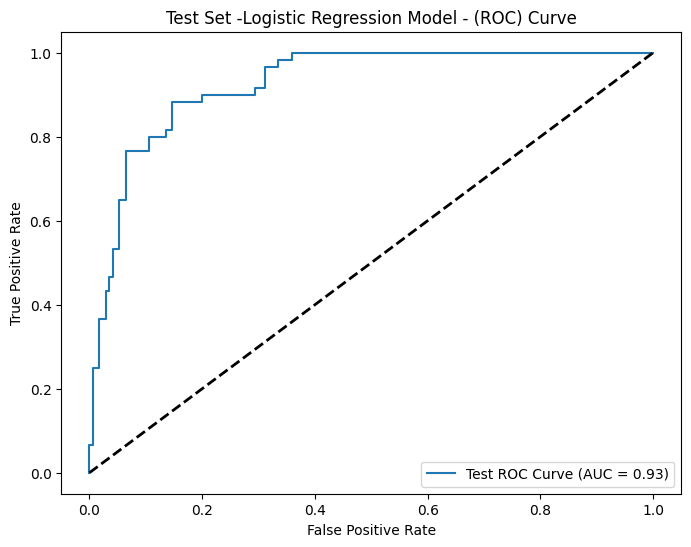

In [ ]:
# Making predictions on the test set of Logistic Regression
predicted_probs_test_LR = LR_model.predict_proba(X_test_scaled_LR)[:, 1]

# Calculate ROC-AUC on the test set
roc_auc_test_LR = roc_auc_score(y_test_S, predicted_probs_test_LR)
print(f"Test ROC-AUC: {roc_auc_test_LR:.4f}")

# Calculate ROC curve on the test set
fpr_test_LR, tpr_test_LR, _ = roc_curve(y_test_S, predicted_probs_test_LR)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_LR, tpr_test_LR, label=f'Test ROC Curve (AUC = {roc_auc_test_LR:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set -Logistic Regression Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**4.2 KNN model**

In [ ]:
#Creating a list to store the cross-validation scores for different values of k
k_grid = list(range(1, 21))  # Try k values from 1 to 20, for example
cv_scores = []

In [ ]:
for k in k_grid:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    scores = cross_val_score(knn, X_train_scaled_LR, y_resampled_S, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

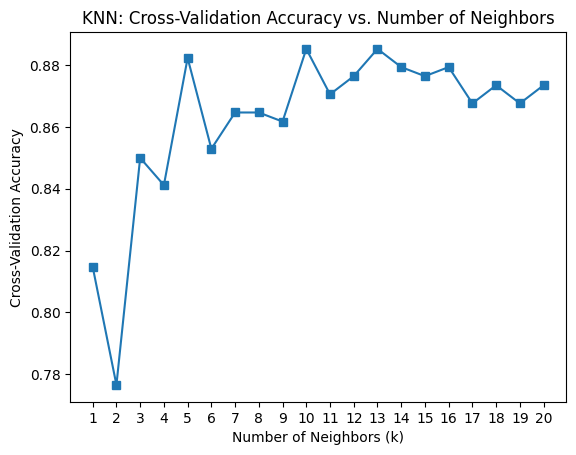

In [ ]:
#Plotting the cross-validation scores to identify the optimal K
plt.plot(k_grid, cv_scores, marker = "s")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN: Cross-Validation Accuracy vs. Number of Neighbors')
plt.xticks(np.arange(min(k_grid), max(k_grid) + 1, 1))
plt.show()


In [ ]:
# Print K and the corresponding cross-validation scores
for k, score in zip(k_grid, cv_scores):
    print(f"K = {k}, Cross-Validation Accuracy = {score:.2f}")

K = 1, Cross-Validation Accuracy = 0.81
K = 2, Cross-Validation Accuracy = 0.78
K = 3, Cross-Validation Accuracy = 0.85
K = 4, Cross-Validation Accuracy = 0.84
K = 5, Cross-Validation Accuracy = 0.88
K = 6, Cross-Validation Accuracy = 0.85
K = 7, Cross-Validation Accuracy = 0.86
K = 8, Cross-Validation Accuracy = 0.86
K = 9, Cross-Validation Accuracy = 0.86
K = 10, Cross-Validation Accuracy = 0.89
K = 11, Cross-Validation Accuracy = 0.87
K = 12, Cross-Validation Accuracy = 0.88
K = 13, Cross-Validation Accuracy = 0.89
K = 14, Cross-Validation Accuracy = 0.88
K = 15, Cross-Validation Accuracy = 0.88
K = 16, Cross-Validation Accuracy = 0.88
K = 17, Cross-Validation Accuracy = 0.87
K = 18, Cross-Validation Accuracy = 0.87
K = 19, Cross-Validation Accuracy = 0.87
K = 20, Cross-Validation Accuracy = 0.87


In [ ]:
#creating KNN classifier with K=5
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
#fitting the KNN model on the resampled training data
knn.fit(X_train_scaled_LR, y_resampled_S)

KNeighborsClassifier(metric='manhattan')

In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_knn_model = cross_val_predict(knn, X_train_scaled_LR, y_resampled_S, cv=5)

# Calculating the full confusion matrix
conf_matrix_knn = confusion_matrix(y_resampled_S, predicted_labels_knn_model)

# Calculate the full classification report
class_report_knn = classification_report(y_resampled_S, predicted_labels_knn_model)

# Calculate accuracy
accuracy_knn = accuracy_score(y_resampled_S, predicted_labels_knn_model)

# Calculate precision
precision_knn = precision_score(y_resampled_S, predicted_labels_knn_model)

# Calculate recall
recall_knn = recall_score(y_resampled_S, predicted_labels_knn_model)

# Calculate F1 score
f1_knn = f1_score(y_resampled_S, predicted_labels_knn_model)


# Print the full confusion matrix and classification report
print("KNN Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_knn)
print("B. Classification Report:")
print(class_report_knn)
print("C. Accuracy: {:.2f}".format(accuracy_knn))
print("D. Precision: {:.2f}".format(precision_knn))
print("E. Recall (Sensitivity): {:.2f}".format(recall_knn))
print("F. F1 Score: {:.2f}".format(f1_knn))

KNN Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[142  28]
 [ 12 158]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       170
           1       0.85      0.93      0.89       170

    accuracy                           0.88       340
   macro avg       0.89      0.88      0.88       340
weighted avg       0.89      0.88      0.88       340

C. Accuracy: 0.88
D. Precision: 0.85
E. Recall (Sensitivity): 0.93
F. F1 Score: 0.89


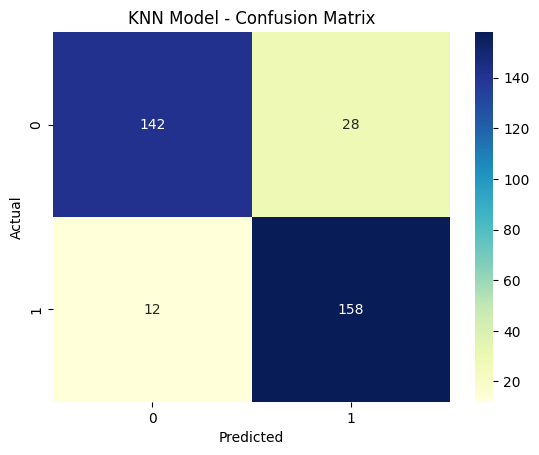

In [ ]:
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='YlGnBu')
plt.title('KNN Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Test ROC-AUC: 0.9688


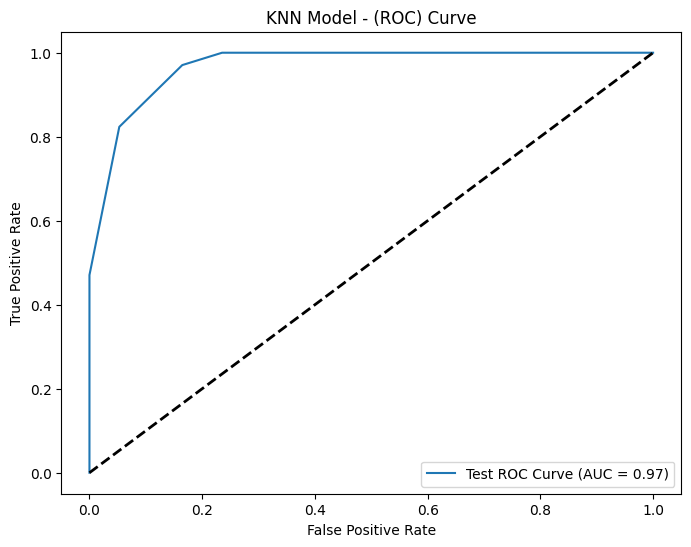

In [ ]:
predicted_probs_knn = knn.predict_proba(X_train_scaled_LR)[:, 1]

# Calculate ROC-AUC on the train set
roc_auc_knn = roc_auc_score(y_resampled_S, predicted_probs_knn)
print(f"Test ROC-AUC: {roc_auc_knn:.4f}")

# Calculate ROC curve on the train set
fpr_knn, tpr_knn, _ = roc_curve(y_resampled_S, predicted_probs_knn)

# Plot ROC curve for the train set
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'Test ROC Curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Making predictions on the test set of Logit Regression
y_pred_test_knn = knn.predict(X_test_scaled_LR)

# Calculating metrics
accuracy_test_knn = accuracy_score(y_test_S, y_pred_test_knn)
precision_test_knn = precision_score(y_test_S, y_pred_test_knn)
recall_test_knn = recall_score(y_test_S, y_pred_test_knn)
f1_test_knn = f1_score(y_test_S, y_pred_test_knn)
conf_matrix_test_knn = confusion_matrix(y_test_S, y_pred_test_knn)

# Printing the evaluation metrics
print("Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_knn))
print("Precision: {:.2f}".format(precision_test_knn))
print("Recall (Sensitivity): {:.2f}".format(recall_test_knn))
print("F1 Score: {:.2f}".format(f1_test_knn))
print("Confusion Matrix:")
print(conf_matrix_test_knn)

Test Set- Confusion Matrix/Classification Report
Accuracy: 0.83
Precision: 0.62
Recall (Sensitivity): 0.93
F1 Score: 0.74
Confusion Matrix:
[[135  35]
 [  4  56]]


Test ROC-AUC: 0.9081


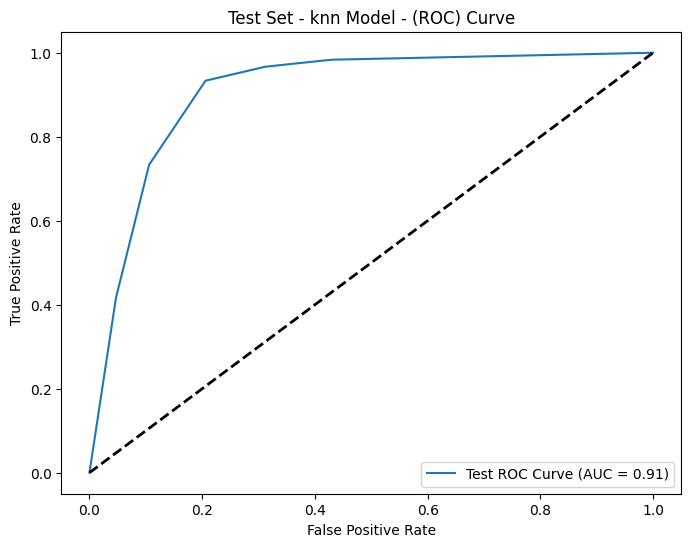

In [ ]:
# Making predictions on the test set of Logistic Regression
predicted_probs_test_knn = knn.predict_proba(X_test_scaled_LR)[:, 1]

# Calculate ROC-AUC on the test set
roc_auc_test_knn = roc_auc_score(y_test_S, predicted_probs_test_knn)
print(f"Test ROC-AUC: {roc_auc_test_knn:.4f}")

# Calculate ROC curve on the test set
fpr_test_knn, tpr_test_knn, _ = roc_curve(y_test_S, predicted_probs_test_knn)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_knn, tpr_test_knn, label=f'Test ROC Curve (AUC = {roc_auc_test_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set - knn Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Section 5: Data Preperation for Ensemble models**

In [ ]:
# Specify binary columns as integers
binary_columns = ['Visible Minority Binary', 'Work Stress binary', 'Food Insecurity binary', 'Instability_Deprivation', 'Mental Health Binary']
data[binary_columns] = data[binary_columns].astype(int)

Label_column = ['Diabetes']
data[Label_column] = data[Label_column].astype(int)

# Specify categorical columns
categorical_columns = ['Residential Instability quintiles', 'Material Deprivation quintiles', 'Ethnic Concentration quintiles']
data[categorical_columns] = data[categorical_columns].astype('category')

# Specify the rest as floats
float_columns = [col for col in data.columns if col not in binary_columns + categorical_columns + Label_column]
data[float_columns] = data[float_columns].astype(float)

In [ ]:
X = data.drop('Diabetes', axis=1)
y = data['Diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Application of SMOTE for upsampling on the training data
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


ct = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), categorical_columns),
    ],
    remainder='passthrough'
)

# Applying the one-hot encoding transformation to X_resampled and X_test
X_resampled = ct.fit_transform(X_resampled, y_resampled)
X_test = ct.transform(X_test)

In [ ]:
#converting numpyarray back to DataFrame
X_resampled= pd.DataFrame(X_resampled, columns=ct.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=ct.get_feature_names_out())

In [ ]:
X_resampled.shape

(340, 34)

In [ ]:
X_test.shape

(230, 34)

In [ ]:
y_resampled.shape

(340,)

In [ ]:
y_test.shape

(230,)

**Section 6. Creating ensemble models**



**6.1 Decision Tress**

In [ ]:
DT_model = DecisionTreeClassifier()

cv_DT = StratifiedKFold(5)
rfecv_DT = RFECV(
    estimator=DT_model,
    step=1,
    cv=cv_DT,
    scoring=accuracy_scoring,
    min_features_to_select=1,
)

rfecv_DT.fit(X_resampled, y_resampled)

# Print the optimal number of selected features
print(f"Optimal number of features -DT: {rfecv_DT.n_features_}")

Optimal number of features -DT: 8


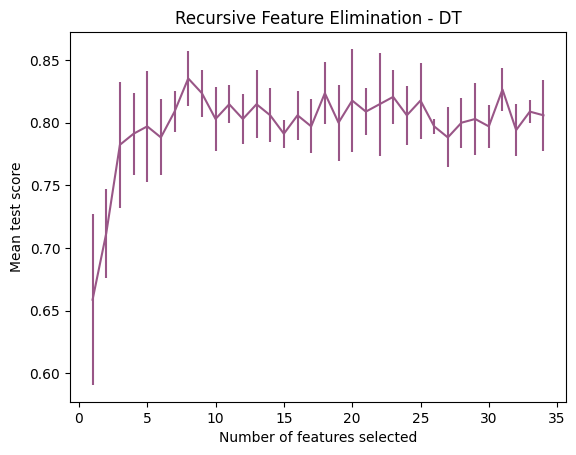

In [ ]:
# Calculate the number of different feature selections tested
n_scores_DT = len(rfecv_DT.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores_DT + 1),
    rfecv_DT.cv_results_["mean_test_score"],
    yerr=rfecv_DT.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination - DT")

# Show the plot
plt.show()


In [ ]:
selected_DT_features = X_resampled.columns[rfecv_DT.support_]

print("Selected Features for DT:")
print(selected_DT_features)

Selected Features for DT:
Index(['remainder__Mental Health Score', 'remainder__High Education Rate',
       'remainder__Average Income', 'remainder__Median Age',
       'remainder__Recent Immigrant Rate', 'remainder__Rented Rate',
       'remainder__Visible Minority Rate', 'remainder__Active transportation',
       'remainder__Rate of Daily Smokers', 'remainder__Overweight',
       'remainder__Obese'],
      dtype='object')


In [ ]:
# Accessing the mean test scores
mean_test_scores_DT = rfecv_DT.cv_results_["mean_test_score"]

# Printing the list of mean test scores along with the number of selected features
for t, score_DT in enumerate(mean_test_scores_DT):
    DT_selected_features = t + 1  #start with one feature
    print(f"Number of Selected Features: {DT_selected_features}, Mean Test Score: {score_DT}")



Number of Selected Features: 1, Mean Test Score: 0.7147058823529413
Number of Selected Features: 2, Mean Test Score: 0.7058823529411764
Number of Selected Features: 3, Mean Test Score: 0.7588235294117648
Number of Selected Features: 4, Mean Test Score: 0.7911764705882351
Number of Selected Features: 5, Mean Test Score: 0.8088235294117647
Number of Selected Features: 6, Mean Test Score: 0.7970588235294118
Number of Selected Features: 7, Mean Test Score: 0.7970588235294118
Number of Selected Features: 8, Mean Test Score: 0.8176470588235294
Number of Selected Features: 9, Mean Test Score: 0.8117647058823529
Number of Selected Features: 10, Mean Test Score: 0.7911764705882353
Number of Selected Features: 11, Mean Test Score: 0.8205882352941176
Number of Selected Features: 12, Mean Test Score: 0.8176470588235294
Number of Selected Features: 13, Mean Test Score: 0.8147058823529412
Number of Selected Features: 14, Mean Test Score: 0.8
Number of Selected Features: 15, Mean Test Score: 0.791176

In [ ]:
#setting parametres
rfe_DT = RFE(DT_model, n_features_to_select=4)
rfe_DT.fit(X_resampled, y_resampled)

#extracting features
most_important_features_DT = X_resampled.columns[rfe_DT.support_]


In [ ]:
most_important_features_DT

Index(['remainder__Mental Health Score', 'remainder__Median Age',
       'remainder__Overweight', 'remainder__Obese'],
      dtype='object')

In [ ]:
DT_features = ['remainder__Mental Health Score', 'remainder__Median Age',
       'remainder__Overweight', 'remainder__Obese']

In [ ]:
#fitting data
X_DT_train = X_resampled[DT_features]
X_DT_test = X_test[DT_features]

In [ ]:
# Initializing a Decision Tree classifier
#we already have balanced class through the previous undersampling step
#thus, class weight will be set to none instead of balanced
dt = DecisionTreeClassifier(criterion='entropy', class_weight=None)

# Creating a pipeline that applies the Decision Tree classifier
model_for_dt = Pipeline([
    ('DT', dt)
])

# Fitting the model on the training data
model_for_dt.fit(X_DT_train, y_resampled)

Pipeline(steps=[('DT', DecisionTreeClassifier(criterion='entropy'))])

**6.1.1 Hyperparametre tunning for Decision Trees**

In [ ]:
# Define the hyperparameter values that should be tested
param_dist_DT = {
    "DT__max_depth" : [3, 5, 7, 10, 15],
    "DT__min_samples_leaf" : [3, 5, 7, 10, 15],
    "DT__splitter" : ['best', 'random'],
    "DT__max_features" : ['sqrt', 'log2']
}

# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_DT = GridSearchCV(
    model_for_dt, param_grid=param_dist_DT, cv=skf)

# Train Grid Search on the training data
random_search_DT.fit(X_DT_train, y_resampled)

# Extract results into a DataFrame
results_DT = pd.DataFrame(random_search_DT.cv_results_)

# Display the set of parameters that achieved the best score
results_DT[results_DT['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_DT__max_depth,param_DT__max_features,param_DT__min_samples_leaf,param_DT__splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
42,0.002568,0.000123,0.00174,0.000108,7,sqrt,5,best,"{'DT__max_depth': 7, 'DT__max_features': 'sqrt...",0.838235,0.897059,0.779412,0.779412,0.897059,0.838235,0.052613,1


In [ ]:
# Retrieve the best hyperparameters after Grid Search
random_search_DT.best_params_



{'DT__max_depth': 7,
 'DT__max_features': 'sqrt',
 'DT__min_samples_leaf': 5,
 'DT__splitter': 'best'}

In [ ]:
# Update the model's hyperparameters to the best found during Grid Search

model_for_dt = model_for_dt.set_params(DT__max_depth = 7, DT__max_features= 'sqrt', DT__min_samples_leaf = 5, DT__splitter = 'best')

# Refit the model using the training data
model_for_dt = model_for_dt.fit(X_DT_train, y_resampled)

In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_DT_model = cross_val_predict(model_for_dt, X_DT_train, y_resampled, cv=5)

# Calculating the full confusion matrix
conf_matrix_DT = confusion_matrix(y_resampled, predicted_labels_DT_model)

# Calculate the full classification report
class_report_DT = classification_report(y_resampled, predicted_labels_DT_model)

# Calculate accuracy
accuracy_DT = accuracy_score(y_resampled, predicted_labels_DT_model)

# Calculate precision
precision_DT = precision_score(y_resampled, predicted_labels_DT_model)

# Calculate recall
recall_DT = recall_score(y_resampled, predicted_labels_DT_model)

# Calculate F1 score
f1_DT = f1_score(y_resampled, predicted_labels_DT_model)


# Print the full confusion matrix and classification report
print("DT Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_DT)
print("B. Classification Report:")
print(class_report_DT)
print("C. Accuracy: {:.2f}".format(accuracy_DT))
print("D. Precision: {:.2f}".format(precision_DT))
print("E. Recall (Sensitivity): {:.2f}".format(recall_DT))
print("F. F1 Score: {:.2f}".format(f1_DT))



DT Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[134  36]
 [ 30 140]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       170
           1       0.80      0.82      0.81       170

    accuracy                           0.81       340
   macro avg       0.81      0.81      0.81       340
weighted avg       0.81      0.81      0.81       340

C. Accuracy: 0.81
D. Precision: 0.80
E. Recall (Sensitivity): 0.82
F. F1 Score: 0.81


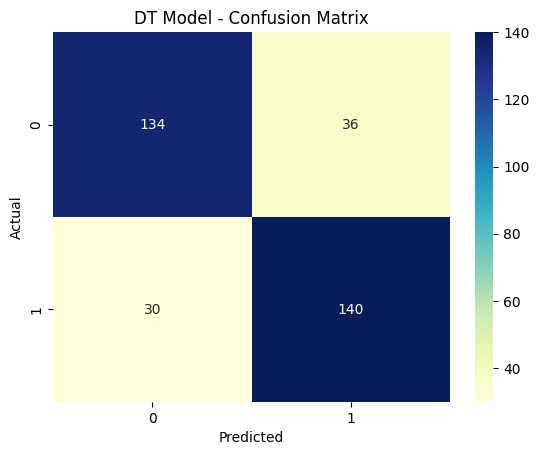

In [ ]:
sns.heatmap(conf_matrix_DT, annot=True, fmt='d', cmap='YlGnBu')
plt.title('DT Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Test ROC-AUC: 0.9787


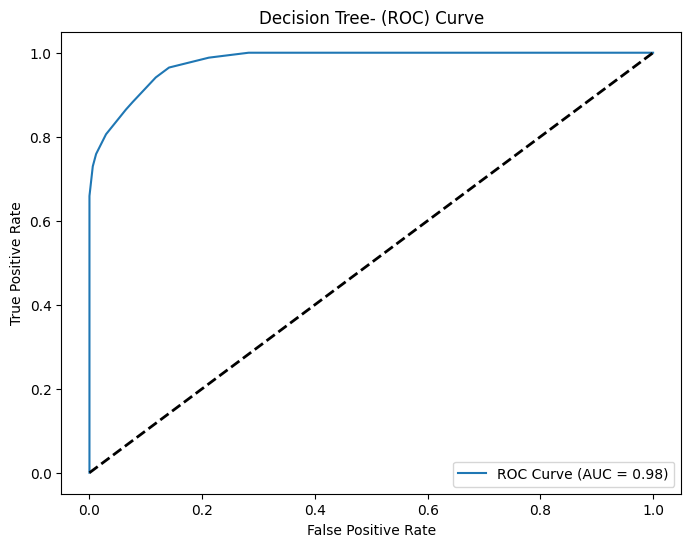

In [ ]:
predicted_probs_DT = model_for_dt.predict_proba(X_DT_train)[:, 1]  # probability of 1 (outcome)

# Calculate ROC-AUC on the train set
roc_auc_train_DT = roc_auc_score(y_resampled, predicted_probs_DT)
print(f"Test ROC-AUC: {roc_auc_train_DT:.4f}")

# Calculate ROC curve on the train set
fpr_DT, tpr_DT, _ = roc_curve(y_resampled, predicted_probs_DT)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_DT, tpr_DT, label=f'ROC Curve (AUC = {roc_auc_train_DT:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree- (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Making predictions on the test set of the DT model
y_pred_test_DT = model_for_dt.predict(X_DT_test)

# Calculating metrics
accuracy_test_DT = accuracy_score(y_test, y_pred_test_DT)
precision_test_DT = precision_score(y_test, y_pred_test_DT)
recall_test_DT = recall_score(y_test, y_pred_test_DT)
f1_test_DT = f1_score(y_test, y_pred_test_DT)
conf_matrix_test_DT = confusion_matrix(y_test, y_pred_test_DT)

# Printing the evaluation metrics
print("DT Model - Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_DT))
print("Precision: {:.2f}".format(precision_test_DT))
print("Recall (Sensitivity): {:.2f}".format(recall_test_DT))
print("F1 Score: {:.2f}".format(f1_test_DT))
print("Confusion Matrix:")
print(conf_matrix_test_DT)



DT Model - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.81
Precision: 0.61
Recall (Sensitivity): 0.80
F1 Score: 0.69
Confusion Matrix:
[[139  31]
 [ 12  48]]


Test ROC-AUC: 0.8913


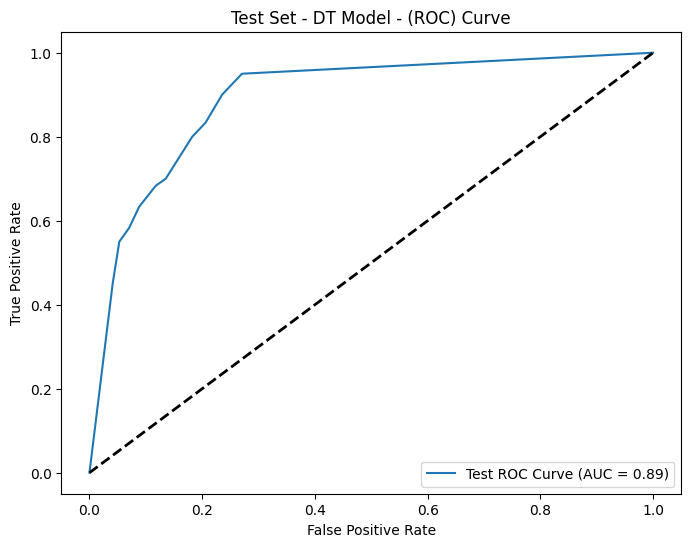

In [ ]:
# Making predictions on the test set of the DT model
predicted_probs_test_DT = model_for_dt.predict_proba(X_DT_test)[:, 1]

# Calculate ROC-AUC on the test set
roc_auc_test_DT = roc_auc_score(y_test, predicted_probs_test_DT)
print(f"Test ROC-AUC: {roc_auc_test_DT:.4f}")

# Calculate ROC curve on the test set
fpr_test_DT, tpr_test_DT, _ = roc_curve(y_test, predicted_probs_test_DT)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_DT, tpr_test_DT, label=f'Test ROC Curve (AUC = {roc_auc_test_DT:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set - DT Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

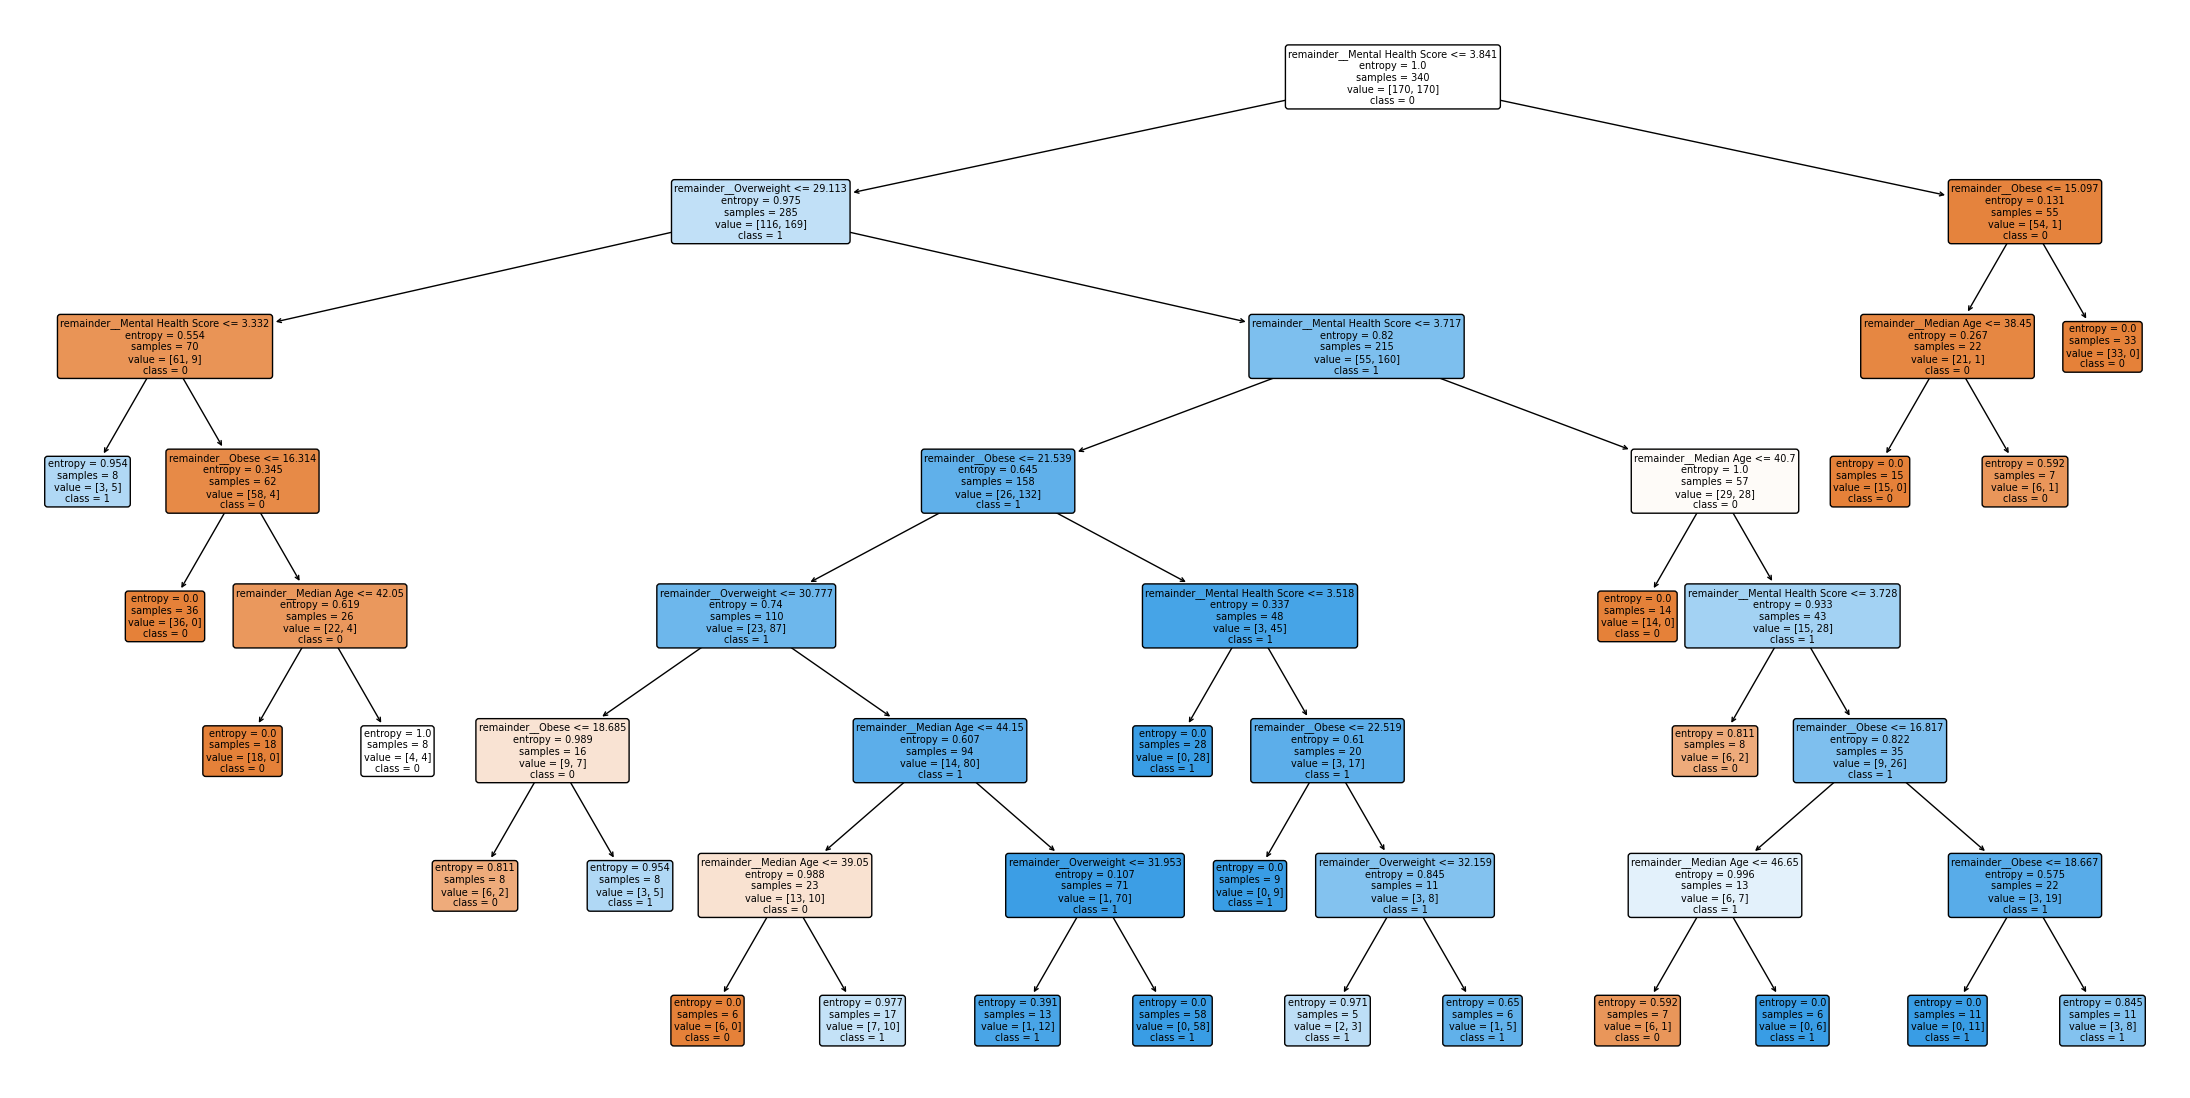

In [ ]:
plt.figure(figsize=(28, 14))
plot_tree(model_for_dt.named_steps['DT'], feature_names=X_DT_train.columns, class_names=['0', '1'], filled=True, rounded=True, fontsize=7)
plt.show()

**6.2 Random Forests**

In [ ]:
RF_model = RandomForestClassifier()

cv_RF = StratifiedKFold(5)
rfecv_RF = RFECV(
    estimator=RF_model,
    step=1,
    cv=cv_RF,
    scoring=accuracy_scoring,
    min_features_to_select=1,
)

rfecv_RF.fit(X_resampled, y_resampled)

# Print the optimal number of selected features
print(f"Optimal number of features -RF: {rfecv_RF.n_features_}")


Optimal number of features -RF: 7


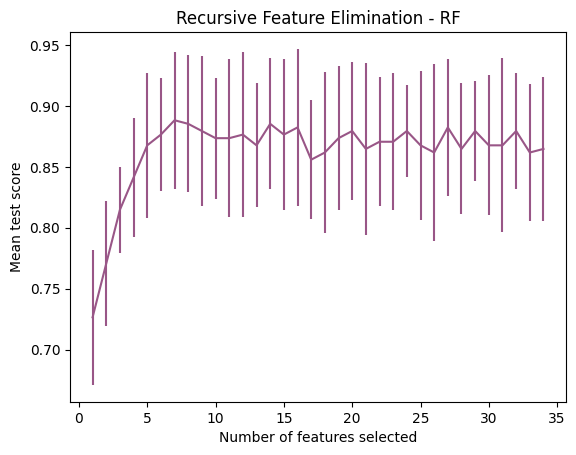

In [ ]:
# Calculate the number of different feature selections tested
n_scores_RF = len(rfecv_RF.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores_RF + 1),
    rfecv_RF.cv_results_["mean_test_score"],
    yerr=rfecv_RF.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination - RF")

# Show the plot
plt.show()

In [ ]:
selected_RF_features = X_resampled.columns[rfecv_RF.support_]

print("Selected Features for RF:")
print(selected_RF_features)

Selected Features for RF:
Index(['remainder__Mental Health Score', 'remainder__Median Age',
       'remainder__Visible Minority Rate', 'remainder__Active transportation',
       'remainder__Rate of Active population', 'remainder__Overweight',
       'remainder__Obese'],
      dtype='object')


In [ ]:
# Accessing the mean test scores
mean_test_scores_RF = rfecv_RF.cv_results_["mean_test_score"]

# Printing the list of mean test scores along with the number of selected features
for r, score_RF in enumerate(mean_test_scores_RF):
    RF_selected_features = r + 1  #start with one feature
    print(f"Number of Selected Features: {RF_selected_features}, Mean Test Score: {score_RF}")

Number of Selected Features: 1, Mean Test Score: 0.7264705882352942
Number of Selected Features: 2, Mean Test Score: 0.7705882352941177
Number of Selected Features: 3, Mean Test Score: 0.8147058823529412
Number of Selected Features: 4, Mean Test Score: 0.8411764705882353
Number of Selected Features: 5, Mean Test Score: 0.8676470588235293
Number of Selected Features: 6, Mean Test Score: 0.876470588235294
Number of Selected Features: 7, Mean Test Score: 0.8882352941176471
Number of Selected Features: 8, Mean Test Score: 0.8852941176470587
Number of Selected Features: 9, Mean Test Score: 0.8794117647058822
Number of Selected Features: 10, Mean Test Score: 0.8735294117647058
Number of Selected Features: 11, Mean Test Score: 0.8735294117647058
Number of Selected Features: 12, Mean Test Score: 0.876470588235294
Number of Selected Features: 13, Mean Test Score: 0.8676470588235293
Number of Selected Features: 14, Mean Test Score: 0.8852941176470589
Number of Selected Features: 15, Mean Test Sc

In [ ]:
RF_features = ['remainder__Mental Health Score', 'remainder__Median Age',
       'remainder__Visible Minority Rate', 'remainder__Active transportation',
       'remainder__Rate of Active population', 'remainder__Overweight',
       'remainder__Obese']

In [ ]:
#fitting data
X_RF_train = X_resampled[RF_features]
X_RF_test = X_test[RF_features]

In [ ]:
# Initializing a Random Forest classifier
#we already have balanced class through the previous undersampling step
#thus, class weight will be set to none instead of balanced
rf = RandomForestClassifier(criterion='entropy', class_weight=None)

# Creating a pipeline that applies the Random Forest
model_for_rf = Pipeline([
    ('random_forest', rf)
])

# Fitting the model on the training data
model_for_rf.fit(X_RF_train, y_resampled)

Pipeline(steps=[('random_forest', RandomForestClassifier(criterion='entropy'))])

**6.2.1 Hyperparametre tunning for Random Forests**

In [ ]:
# Define the hyperparameter values that should be tested
param_dist_RF = {
    "random_forest__n_estimators" : [100, 150, 200],
    "random_forest__max_depth" : [3, 5, 7, 10],
    "random_forest__min_samples_leaf" : [3, 5, 7, 10],
    "random_forest__max_features" : ['sqrt', 'log2']
}

# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_RF = GridSearchCV(
    model_for_rf, param_grid=param_dist_RF, cv=skf)

# Train Grid Search on the training data
random_search_RF.fit(X_RF_train, y_resampled)

# Extract results into a DataFrame
results_RF = pd.DataFrame(random_search_RF.cv_results_)

# Display the set of parameters that achieved the best score
results_RF[results_RF['rank_test_score'] == 1]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__min_samples_leaf,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
72,0.177638,0.003803,0.008126,0.000584,10,sqrt,3,100,"{'random_forest__max_depth': 10, 'random_fores...",0.838235,0.941176,0.852941,0.882353,0.955882,0.894118,0.046875,1


In [ ]:
# Retrieve the best hyperparameters after Grid Search for RF
random_search_RF.best_params_

{'random_forest__max_depth': 10,
 'random_forest__max_features': 'sqrt',
 'random_forest__min_samples_leaf': 3,
 'random_forest__n_estimators': 100}

In [ ]:
# Update the model's hyperparameters to the best found during Grid Search
model_for_rf = model_for_rf.set_params(random_forest__max_depth = 10, random_forest__max_features = 'sqrt', random_forest__min_samples_leaf = 3, random_forest__n_estimators = 100)


# Refit the model using the training data
model_for_rf = model_for_rf.fit(X_RF_train, y_resampled)

In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_RF_model = cross_val_predict(model_for_rf, X_RF_train, y_resampled, cv=5)

# Calculating the full confusion matrix
conf_matrix_RF = confusion_matrix(y_resampled, predicted_labels_RF_model)

# Calculate the full classification report
class_report_RF = classification_report(y_resampled, predicted_labels_RF_model)

# Calculate accuracy
accuracy_RF = accuracy_score(y_resampled, predicted_labels_RF_model)

# Calculate precision
precision_RF = precision_score(y_resampled, predicted_labels_RF_model)

# Calculate recall
recall_RF = recall_score(y_resampled, predicted_labels_RF_model)

# Calculate F1 score
f1_RF = f1_score(y_resampled, predicted_labels_RF_model)


# Print the full confusion matrix and classification report
print("RF Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_RF)
print("B. Classification Report:")
print(class_report_RF)
print("C. Accuracy: {:.2f}".format(accuracy_RF))
print("D. Precision: {:.2f}".format(precision_RF))
print("E. Recall (Sensitivity): {:.2f}".format(recall_RF))
print("F. F1 Score: {:.2f}".format(f1_RF))

RF Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[149  21]
 [ 14 156]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       170
           1       0.88      0.92      0.90       170

    accuracy                           0.90       340
   macro avg       0.90      0.90      0.90       340
weighted avg       0.90      0.90      0.90       340

C. Accuracy: 0.90
D. Precision: 0.88
E. Recall (Sensitivity): 0.92
F. F1 Score: 0.90


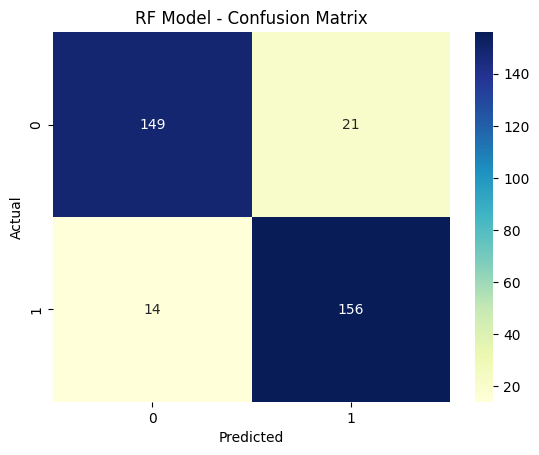

In [ ]:
sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='YlGnBu')
plt.title('RF Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Test ROC-AUC: 0.9983


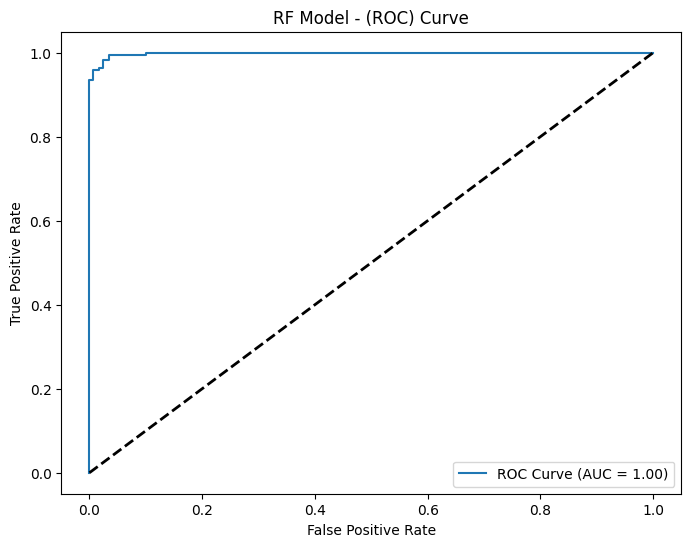

In [ ]:
predicted_probs_RF = model_for_rf.predict_proba(X_RF_train)[:, 1]  # probability of 1 (outcome)

# Calculate ROC-AUC
roc_auc_train_RF = roc_auc_score(y_resampled, predicted_probs_RF)
print(f"Test ROC-AUC: {roc_auc_train_RF:.4f}")

# Calculate ROC curve
fpr_RF, tpr_RF, _ = roc_curve(y_resampled, predicted_probs_RF)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_RF, tpr_RF, label=f'ROC Curve (AUC = {roc_auc_train_RF:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Making predictions on the test set of the RF model
y_pred_test_RF = model_for_rf.predict(X_RF_test)

# Calculating metrics
accuracy_test_RF = accuracy_score(y_test, y_pred_test_RF)
precision_test_RF = precision_score(y_test, y_pred_test_RF)
recall_test_RF = recall_score(y_test, y_pred_test_RF)
f1_test_RF = f1_score(y_test, y_pred_test_RF)
conf_matrix_test_RF = confusion_matrix(y_test, y_pred_test_RF)

# Printing the evaluation metrics
print("Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_RF))
print("Precision: {:.2f}".format(precision_test_RF))
print("Recall (Sensitivity): {:.2f}".format(recall_test_RF))
print("F1 Score: {:.2f}".format(f1_test_RF))
print("Confusion Matrix:")
print(conf_matrix_test_RF)

Test Set- Confusion Matrix/Classification Report
Accuracy: 0.87
Precision: 0.69
Recall (Sensitivity): 0.92
F1 Score: 0.79
Confusion Matrix:
[[145  25]
 [  5  55]]


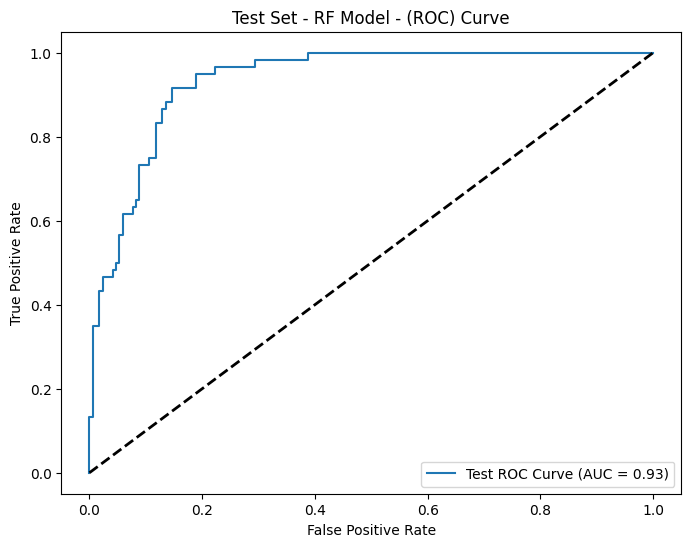

In [ ]:
# Making predictions on the test set of the RF model
predicted_probs_test_RF = model_for_rf.predict_proba(X_RF_test)[:, 1]

# Calculate ROC-AUC on the test set
roc_auc_test_RF = roc_auc_score(y_test, predicted_probs_test_RF)

# Calculate ROC curve on the test set
fpr_test_RF, tpr_test_RF, _ = roc_curve(y_test, predicted_probs_test_RF)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_RF, tpr_test_RF, label=f'Test ROC Curve (AUC = {roc_auc_test_RF:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set - RF Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**6.3 XGBOOST**

In [ ]:
xgb_model = GradientBoostingClassifier()

cv_xgb = StratifiedKFold(5)

rfecv_xgb = RFECV(
    estimator=xgb_model,
    step=1,
    cv=cv_xgb,
    scoring=accuracy_scoring,
    min_features_to_select=1,
)

rfecv_xgb.fit(X_resampled, y_resampled)

# Print the optimal number of selected features
print(f"Optimal number of features (XGB): {rfecv_xgb.n_features_}")

Optimal number of features (XGB): 13


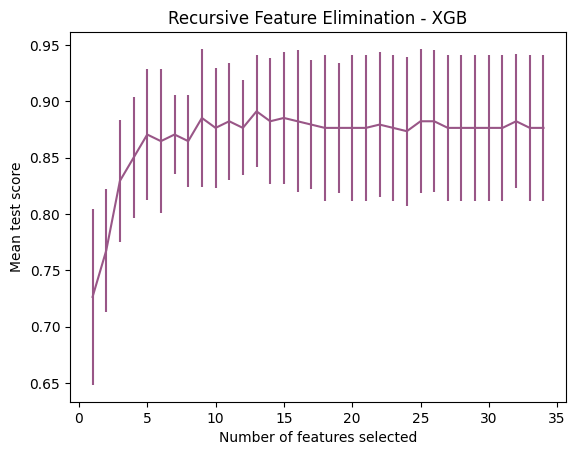

In [ ]:
# Calculate the number of different feature selections tested
n_scores_XGB = len(rfecv_xgb.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores_XGB + 1),
    rfecv_xgb.cv_results_["mean_test_score"],
    yerr=rfecv_xgb.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination - XGB")

# Show the plot
plt.show()

In [ ]:
selected_xgb_features = [i for i in X_resampled.columns[rfecv_xgb.support_]]

print("Selected Features for XGB:")
print(selected_xgb_features)

Selected Features for XGB:
['one_hot_encoder__Ethnic Concentration quintiles_1', 'remainder__Mental Health Score', 'remainder__Unemployment Rate', 'remainder__Average Income', 'remainder__Median Age', 'remainder__Recent Immigrant Rate', 'remainder__Visible Minority Rate', 'remainder__Work Stress Score', 'remainder__Active transportation', 'remainder__Rate of Active population', 'remainder__Rate of Daily Smokers', 'remainder__Overweight', 'remainder__Obese']


In [ ]:
# Accessing the mean test scores
mean_test_scores_xgb = rfecv_xgb.cv_results_["mean_test_score"]

# Printing the list of mean test scores along with the number of selected features
for t, score_xgb in enumerate(mean_test_scores_xgb):
    xgb_selected_features = t + 1  #start with one feature
    print(f"Number of Selected Features: {xgb_selected_features}, Mean Test Score: {score_xgb}")

Number of Selected Features: 1, Mean Test Score: 0.7264705882352941
Number of Selected Features: 2, Mean Test Score: 0.7676470588235295
Number of Selected Features: 3, Mean Test Score: 0.8294117647058823
Number of Selected Features: 4, Mean Test Score: 0.85
Number of Selected Features: 5, Mean Test Score: 0.8705882352941176
Number of Selected Features: 6, Mean Test Score: 0.8647058823529411
Number of Selected Features: 7, Mean Test Score: 0.8705882352941176
Number of Selected Features: 8, Mean Test Score: 0.8647058823529411
Number of Selected Features: 9, Mean Test Score: 0.8852941176470587
Number of Selected Features: 10, Mean Test Score: 0.876470588235294
Number of Selected Features: 11, Mean Test Score: 0.8823529411764707
Number of Selected Features: 12, Mean Test Score: 0.876470588235294
Number of Selected Features: 13, Mean Test Score: 0.8911764705882353
Number of Selected Features: 14, Mean Test Score: 0.8823529411764707
Number of Selected Features: 15, Mean Test Score: 0.8852941

In [ ]:
#setting parametres
rfe_xgb = RFE(xgb_model, n_features_to_select=5)
rfe_xgb.fit(X_resampled, y_resampled)

#extracting features
most_important_features_XGB = X_resampled.columns[rfe_xgb.support_]

In [ ]:
most_important_features_XGB

Index(['remainder__Mental Health Score', 'remainder__Median Age',
       'remainder__Visible Minority Rate', 'remainder__Overweight',
       'remainder__Obese'],
      dtype='object')



6.2 Hyperparametre tunning for XGBoost


In [ ]:
xgb_features = ['remainder__Mental Health Score', 'remainder__Median Age',
       'remainder__Visible Minority Rate', 'remainder__Overweight',
       'remainder__Obese']

In [ ]:
X_XGB_train = X_resampled[xgb_features]
X_XGB_test = X_test[xgb_features]

In [ ]:
# Initializing the Gradient Boosting model with initial parameters
xgb = GradientBoostingClassifier()

# Creating a pipeline that first applies the column transformations and then runs the Gradient Boosting model
model_for_xgb = Pipeline([
    ('xg_boost', xgb)
])

# Fitting the model on the training data
model_for_xgb.fit(X_XGB_train, y_resampled)

Pipeline(steps=[('xg_boost', GradientBoostingClassifier())])

**6.3.1 Hyperparametre tunning for XGB**

In [ ]:
### Hyperparameter tuning using GridSearchCV
param_dist_xgb = {
    "xg_boost__n_estimators" : [50, 100, 150],
    "xg_boost__max_depth" : [3, 5, 7],
    "xg_boost__min_samples_leaf" : [3, 5, 7, 10],
    "xg_boost__learning_rate" : [.1]
}

# Using StratifiedKFold for cross-validation, ensuring each fold has the same proportion of observations with each target value
skf = StratifiedKFold(n_splits=5)

# Setting up the GridSearchCV to find the best hyperparameters for the Gradient Boosting model
random_search_xgb = GridSearchCV(
    model_for_xgb, param_grid=param_dist_xgb, cv=skf
)

# Fitting the GridSearchCV on the training data
random_search_xgb.fit(X_XGB_train, y_resampled)

# Extract results into a DataFrame
results_xgb = pd.DataFrame(random_search_xgb.cv_results_)

# Display the set of parameters that achieved the best score
results_xgb[results_xgb['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xg_boost__learning_rate,param_xg_boost__max_depth,param_xg_boost__min_samples_leaf,param_xg_boost__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,0.080937,0.004129,0.002922,0.000581,0.1,5,10,50,"{'xg_boost__learning_rate': 0.1, 'xg_boost__ma...",0.911765,0.926471,0.808824,0.823529,0.926471,0.879412,0.052118,1


In [ ]:
# Retrieve the best hyperparameters after Grid Search for RF
random_search_xgb.best_params_

{'xg_boost__learning_rate': 0.1,
 'xg_boost__max_depth': 5,
 'xg_boost__min_samples_leaf': 10,
 'xg_boost__n_estimators': 50}

In [ ]:
# Update the model's hyperparameters to the best found during Grid Search
model_for_xgb = model_for_xgb.set_params(xg_boost__n_estimators = 50, xg_boost__max_depth = 5, xg_boost__min_samples_leaf = 10, xg_boost__learning_rate = 0.1)


# Refit the model using the training data
model_for_xgb = model_for_xgb.fit(X_XGB_train, y_resampled)

In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_xgb_model = cross_val_predict(model_for_xgb, X_XGB_train, y_resampled, cv=5)

# Calculating the full confusion matrix
conf_matrix_xgb = confusion_matrix(y_resampled, predicted_labels_xgb_model)

# Calculate the full classification report
class_report_xgb = classification_report(y_resampled, predicted_labels_xgb_model)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_resampled, predicted_labels_xgb_model)

# Calculate precision
precision_xgb = precision_score(y_resampled, predicted_labels_xgb_model)

# Calculate recall
recall_xgb = recall_score(y_resampled, predicted_labels_xgb_model)

# Calculate F1 score
f1_xgb = f1_score(y_resampled, predicted_labels_xgb_model)


# Print the full confusion matrix and classification report
print("XGB Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_xgb)
print("B. Classification Report:")
print(class_report_xgb)
print("C. Accuracy: {:.2f}".format(accuracy_xgb))
print("D. Precision: {:.2f}".format(precision_xgb))
print("E. Recall (Sensitivity): {:.2f}".format(recall_xgb))
print("F. F1 Score: {:.2f}".format(f1_xgb))

XGB Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[147  23]
 [ 16 154]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       170
           1       0.87      0.91      0.89       170

    accuracy                           0.89       340
   macro avg       0.89      0.89      0.89       340
weighted avg       0.89      0.89      0.89       340

C. Accuracy: 0.89
D. Precision: 0.87
E. Recall (Sensitivity): 0.91
F. F1 Score: 0.89


Test ROC-AUC: 0.9999


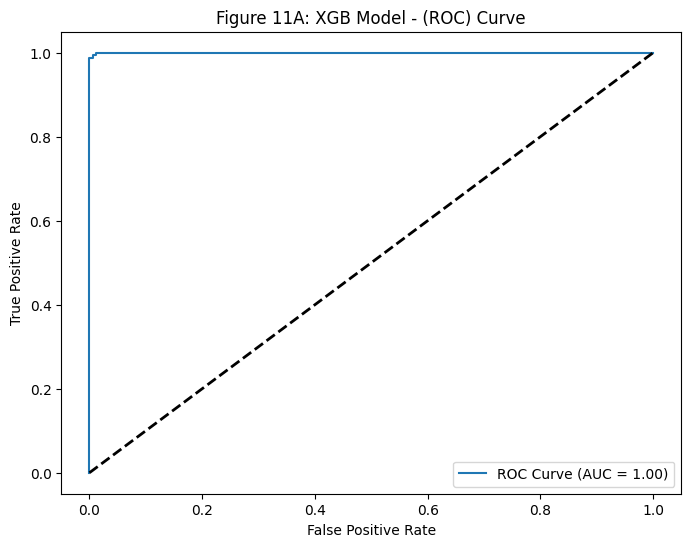

In [ ]:
predicted_probs_xgb = model_for_xgb.predict_proba(X_XGB_train)[:, 1]

# Calculate ROC-AUC
roc_auc_xgb = roc_auc_score(y_resampled, predicted_probs_xgb)
print(f"Test ROC-AUC: {roc_auc_xgb:.4f}")

# Calculate ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_resampled, predicted_probs_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'ROC Curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 11A: XGB Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Making predictions on the test set of the xgb model
y_pred_test_xgb = model_for_xgb.predict(X_XGB_test)

# Calculating metrics
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
precision_test_xgb = precision_score(y_test, y_pred_test_xgb)
recall_test_xgb = recall_score(y_test, y_pred_test_xgb)
f1_test_xgb = f1_score(y_test, y_pred_test_xgb)
conf_matrix_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)

# Printing the evaluation metrics
print("XGB Model - Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_xgb))
print("Precision: {:.2f}".format(precision_test_xgb))
print("Recall (Sensitivity): {:.2f}".format(recall_test_xgb))
print("F1 Score: {:.2f}".format(f1_test_xgb))
print("Confusion Matrix:")
print(conf_matrix_test_xgb)

XGB Model - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.85
Precision: 0.65
Recall (Sensitivity): 0.90
F1 Score: 0.76
Confusion Matrix:
[[141  29]
 [  6  54]]


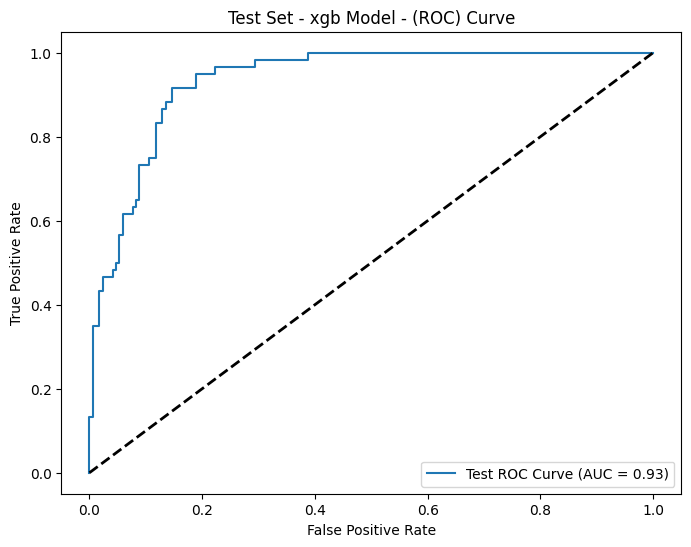

In [ ]:
# Making predictions on the test set of the RF model
predicted_probs_test_xgb = model_for_rf.predict_proba(X_RF_test)[:, 1]

# Calculate ROC-AUC on the test set
roc_auc_test_xgb = roc_auc_score(y_test, predicted_probs_test_xgb)

# Calculate ROC curve on the test set
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, predicted_probs_test_xgb)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_xgb, tpr_test_xgb, label=f'Test ROC Curve (AUC = {roc_auc_test_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set - xgb Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Section 7: Summary of models**

**7.1 Evaluations**

In [ ]:
# setting evaluations
evaluations = {
    'Model': ['LR Training', 'LR Test', 'KNN Training', 'KNN Test', 'DT Training', 'DT Test', 'RF Training', 'RF Test', 'XGB train', 'XGB test'],
    'Accuracy': [accuracy_LR, accuracy_test_LR, accuracy_knn, accuracy_test_knn, accuracy_DT, accuracy_test_DT, accuracy_RF, accuracy_test_RF, accuracy_xgb, accuracy_test_xgb],
    'Precision': [precision_LR, precision_test_LR, precision_knn, precision_test_knn, precision_DT, precision_test_DT, precision_RF, precision_test_RF, precision_xgb, precision_test_xgb],
    'Recall (Sensitivity)': [recall_LR, recall_test_LR, recall_knn, recall_test_knn, recall_DT, recall_test_DT, recall_RF, recall_test_RF, recall_xgb, recall_test_xgb],
    'F1 Score': [f1_LR, f1_test_LR, f1_knn, f1_test_knn, f1_DT, f1_test_DT, f1_RF, f1_test_RF, f1_xgb, f1_test_xgb]
}

# Creating a DataFrame
results_summary = pd.DataFrame(evaluations)

# Displaying the combined evaluation results
print(results_summary)

          Model  Accuracy  Precision  Recall (Sensitivity)  F1 Score
0   LR Training  0.879412   0.852459              0.917647  0.883853
1       LR Test  0.826087   0.616279              0.883333  0.726027
2  KNN Training  0.882353   0.849462              0.929412  0.887640
3      KNN Test  0.830435   0.615385              0.933333  0.741722
4   DT Training  0.805882   0.795455              0.823529  0.809249
5       DT Test  0.813043   0.607595              0.800000  0.690647
6   RF Training  0.897059   0.881356              0.917647  0.899135
7       RF Test  0.869565   0.687500              0.916667  0.785714
8     XGB train  0.885294   0.870056              0.905882  0.887608
9      XGB test  0.847826   0.650602              0.900000  0.755245


**7.2 ROC curves**

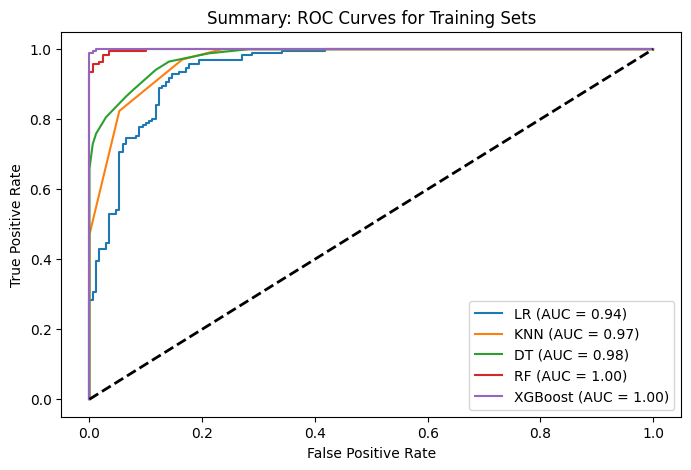

In [ ]:
# Creating a figure
plt.figure(figsize=(8, 5))

# Plotting the ROC curves for training sets (all models)
plt.title('Summary: ROC Curves for Training Sets')
plt.plot(fpr_LR, tpr_LR, label=f'LR (AUC = {roc_auc_train_LR:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_DT, tpr_DT, label=f'DT (AUC = {roc_auc_train_DT:.2f})')
plt.plot(fpr_RF, tpr_RF, label=f'RF (AUC = {roc_auc_train_RF:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
# Plotting the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Display the graph
plt.show()


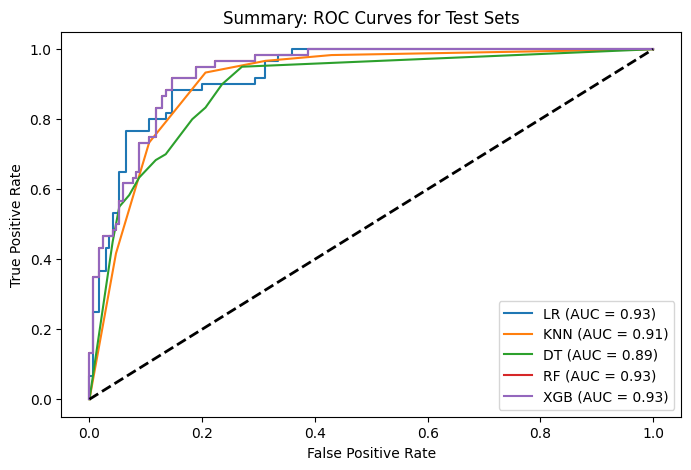

In [ ]:
# Creating a figure
plt.figure(figsize=(8, 5))

# Plotting the ROC curves for training sets (all models)
plt.title('Summary: ROC Curves for Test Sets')
plt.plot(fpr_test_LR, tpr_test_LR, label=f'LR (AUC = {roc_auc_test_LR:.2f})')
plt.plot(fpr_test_knn, tpr_test_knn, label=f'KNN (AUC = {roc_auc_test_knn:.2f})')
plt.plot(fpr_test_DT, tpr_test_DT, label=f'DT (AUC = {roc_auc_test_DT:.2f})')
plt.plot(fpr_test_RF, tpr_test_RF, label=f'RF (AUC = {roc_auc_test_RF:.2f})')
plt.plot(fpr_test_xgb, tpr_test_xgb, label=f'XGB (AUC = {roc_auc_test_xgb:.2f})')

# Plotting the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Display the graph
plt.show()

In [ ]:
print("Number of Selected Features by Model")
features_table_summary = pd.DataFrame(columns=["Model", "Number of Features"])
features_table_summary.loc[len(features_table_summary)] = "LR", len(LR_features)
features_table_summary.loc[len(features_table_summary)] = "DT", len(DT_features)
features_table_summary.loc[len(features_table_summary)] = "RF", len(RF_features)
features_table_summary.loc[len(features_table_summary)] = "XGB", len(xgb_features)
print(features_table_summary)

Number of Selected Features by Model
  Model  Number of Features
0    LR                   4
1    DT                   4
2    RF                   7
3   XGB                   5


In [ ]:
counted = dict(Counter(LR_features+DT_features+RF_features+xgb_features))
overall_features = [i for i in counted.keys()]
overall_counts = [i for i in counted.values()]

print(f"The following variables were used most frequently, in {max(overall_counts):.0f} models:")
for i in range(len(overall_counts)):
  if overall_counts[i] == max(overall_counts):
    print(overall_features[i])

The following variables were used most frequently, in 4 models:
remainder__Mental Health Score


______________________________________


**7.3 Most Important Features**

In [ ]:
Key_features = ['remainder__Mental Health Score', 'remainder__log_median_age',
       'remainder__log_visible_minority_rate', 'remainder__Active transportation',
       'remainder__Rate of Active population', 'remainder__Overweight',
       'remainder__log_obese']

In [ ]:
#Fitting the data
X_train_LR_model = scaler.fit_transform(X_resampled_S[Key_features])
X_test_LR_model = scaler.transform(X_test_S[Key_features])

In [ ]:
LR_model2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
LR_model2.fit(X_train_LR_model, y_resampled_S)

LogisticRegression(solver='liblinear')

In [ ]:
# Create and fit logistic regression model
log_reg2_fit = sm.Logit(y_resampled_S, X_train_LR_model).fit()

# Get summary report
summary2 = log_reg2_fit.summary()
print(summary2)

# Calculate odds ratios
coefficients = log_reg2_fit.params
odds_ratios = np.exp(coefficients)

# Calculate standard errors
standard_errors = log_reg2_fit.bse

# Calculate 95% CI for odds ratios
lower_bound = np.exp(coefficients - 1.96 * standard_errors)
upper_bound = np.exp(coefficients + 1.96 * standard_errors)

# Print results
for idx, coef in enumerate(log_reg2_fit.params.index):
    print(f"For {coef}: Odds Ratio: {odds_ratios[idx]:.4f}, 95% CI: ({lower_bound[idx]:.4f}, {upper_bound[idx]:.4f})")

Optimization terminated successfully.
         Current function value: 0.358781
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                  340
Model:                          Logit   Df Residuals:                      333
Method:                           MLE   Df Model:                            6
Date:                Sat, 09 Dec 2023   Pseudo R-squ.:                  0.4824
Time:                        03:42:28   Log-Likelihood:                -121.99
converged:                       True   LL-Null:                       -235.67
Covariance Type:            nonrobust   LLR p-value:                 2.789e-46
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7393      0.337     -2.196      0.028      -1.399      -0.080
x2             1.9195      0.